# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which helps  to predict seven different cover types in four different wilderness areas of the Forest with the best accuracy..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [20]:
data=pd.read_csv('/content/gdrive/My Drive/capstone project/forest_cover/Data/train.csv')

# Basic checks

In [21]:
data.shape

(15120, 56)

In [22]:
data.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [23]:
data.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
15115            0            0            0           3  
15116            0            0            0           3  
15117            0            0            0           3  
15118            0            0            0           3  
15119            0            0            0           3  

[5 rows x 56 columns]

In [24]:
data.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [26]:
data.describe().T

count         mean          std     min  \
Id                                  15120.0  7560.500000  4364.912370     1.0   
Elevation                           15120.0  2749.322553   417.678187  1863.0   
Aspect                              15120.0   156.676653   110.085801     0.0   
Slope                               15120.0    16.501587     8.453927     0.0   
Horizontal_Distance_To_Hydrology    15120.0   227.195701   210.075296     0.0   
Vertical_Distance_To_Hydrology      15120.0    51.076521    61.239406  -146.0   
Horizontal_Distance_To_Roadways     15120.0  1714.023214  1325.066358     0.0   
Hillshade_9am                       15120.0   212.704299    30.561287     0.0   
Hillshade_Noon                      15120.0   218.965608    22.801966    99.0   
Hillshade_3pm                       15120.0   135.091997    45.895189     0.0   
Horizontal_Distance_To_Fire_Points  15120.0  1511.147288  1099.936493     0.0   
Wilderness_Area1                    15120.0     0.237897     0.425810     0.0   
Wilderness_Area2                    15120.0     0.033003     0.178649     0.0   
Wilderness_Area3                    15120.0     0.419907     0.493560     0.0   
Wilderness_Area4                    15120.0     0.309193     0.462176     0.0   
Soil_Type1                          15120.0     0.023479     0.151424     0.0   
Soil_Type2                          15120.0     0.041204     0.198768     0.0   
Soil_Type3                          15120.0     0.063624     0.244091     0.0   
Soil_Type4                          15120.0     0.055754     0.229454     0.0   
Soil_Type5                          15120.0     0.010913     0.103896     0.0   
Soil_Type6                          15120.0     0.042989     0.202840     0.0   
Soil_Type7                          15120.0     0.000000     0.000000     0.0   
Soil_Type8                          15120.0     0.000066     0.008133     0.0   
Soil_Type9                          15120.0     0.000661     0.025710     0.0   
Soil_Type10                         15120.0     0.141667     0.348719     0.0   
Soil_Type11                         15120.0     0.026852     0.161656     0.0   
Soil_Type12                         15120.0     0.015013     0.121609     0.0   
Soil_Type13                         15120.0     0.031481     0.174621     0.0   
Soil_Type14                         15120.0     0.011177     0.105133     0.0   
Soil_Type15                         15120.0     0.000000     0.000000     0.0   
Soil_Type16                         15120.0     0.007540     0.086506     0.0   
Soil_Type17                         15120.0     0.040476     0.197080     0.0   
Soil_Type18                         15120.0     0.003968     0.062871     0.0   
Soil_Type19                         15120.0     0.003042     0.055075     0.0   
Soil_Type20                         15120.0     0.009193     0.095442     0.0   
Soil_Type21                         15120.0     0.001058     0.032514     0.0   
Soil_Type22                         15120.0     0.022817     0.149326     0.0   
Soil_Type23                         15120.0     0.050066     0.218089     0.0   
Soil_Type24                         15120.0     0.016997     0.129265     0.0   
Soil_Type25                         15120.0     0.000066     0.008133     0.0   
Soil_Type26                         15120.0     0.003571     0.059657     0.0   
Soil_Type27                         15120.0     0.000992     0.031482     0.0   
Soil_Type28                         15120.0     0.000595     0.024391     0.0   
Soil_Type29                         15120.0     0.085384     0.279461     0.0   
Soil_Type30                         15120.0     0.047950     0.213667     0.0   
Soil_Type31                         15120.0     0.021958     0.146550     0.0   
Soil_Type32                         15120.0     0.045635     0.208699     0.0   
Soil_Type33                         15120.0     0.040741     0.197696     0.0   
Soil_Type34                         15120.0     0.001455     0.038118

In [27]:
data.duplicated().sum()

0

In [28]:
data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [29]:
data['Cover_Type'].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

*  It is a supervised learning classification problem
*  Dataset contains 15120 rows and 56 columns
*  All features datatype are int; 44 columns are having binary type data
*  while looking at the data, we can understand that it is label encoded
*  Target column is cover_type ( cover types values  are: 1 to 7 )
*  features soil_type 15 and soil_type 7 contains only 0 values
*   missing values and duplicates are not present in the dataset



# EDA and Data analysis

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.0 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv#importing sweetviz library
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



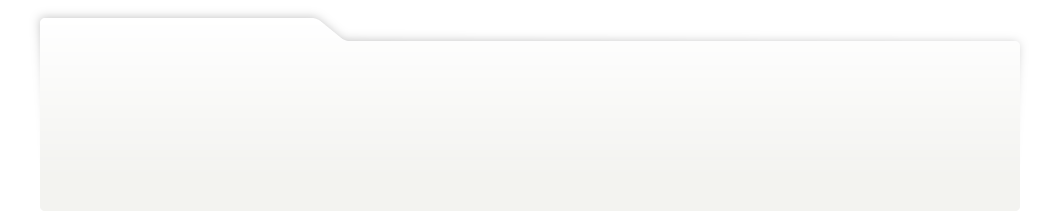
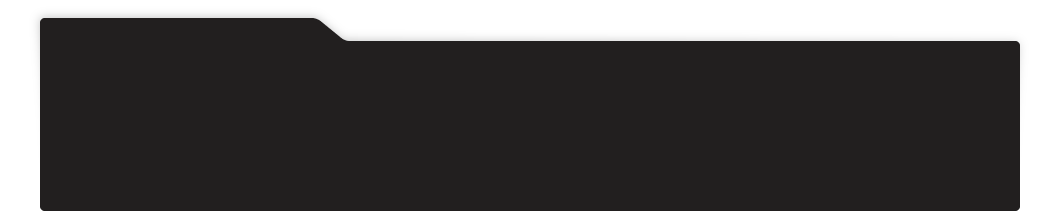
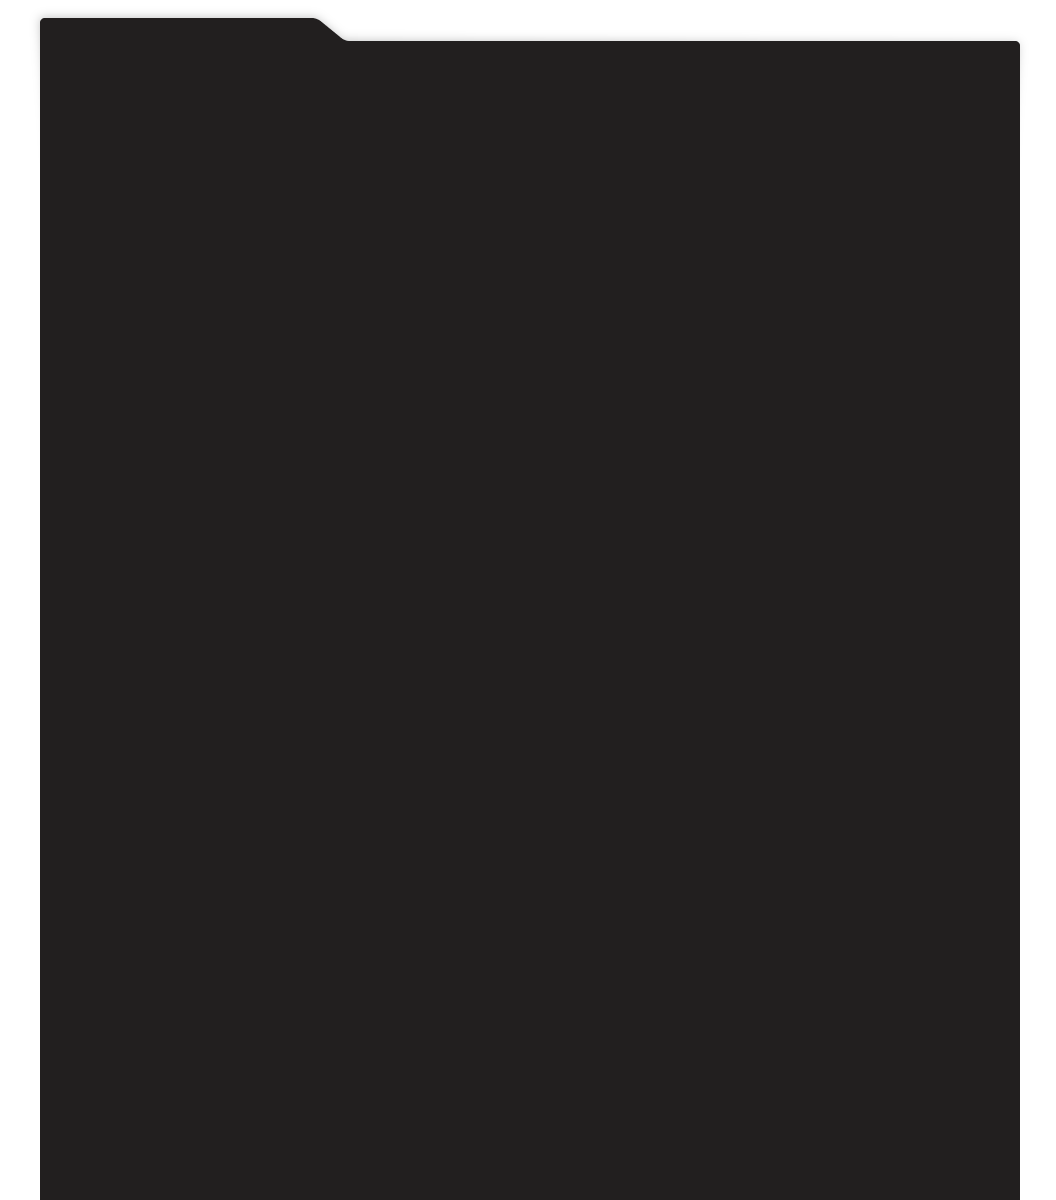
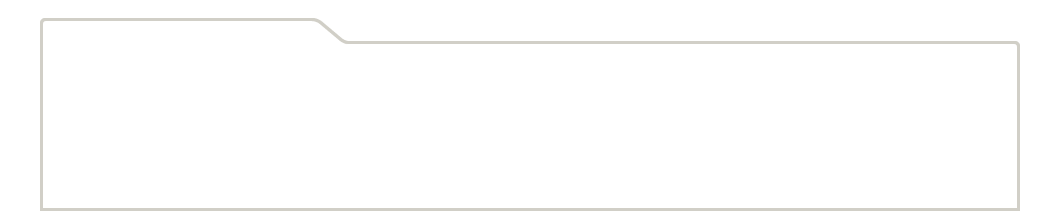
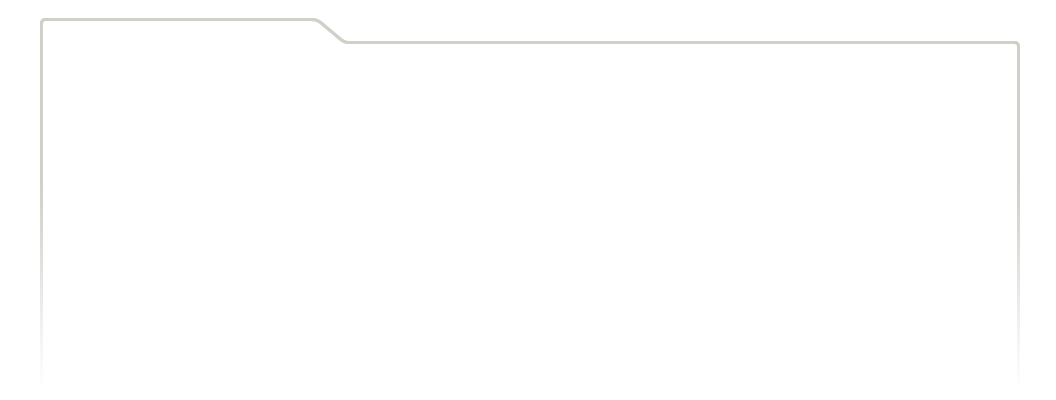
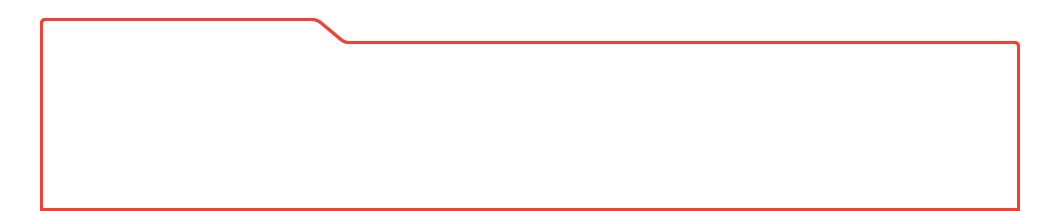
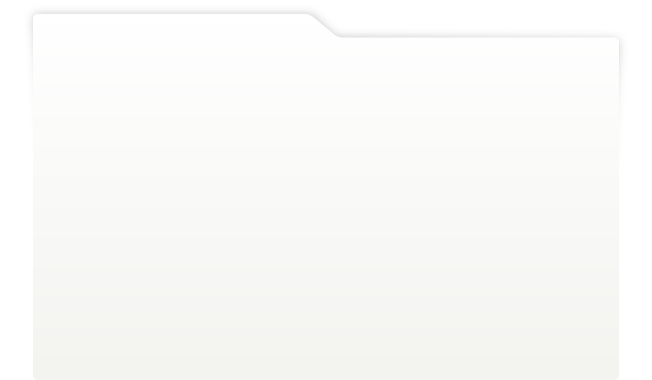
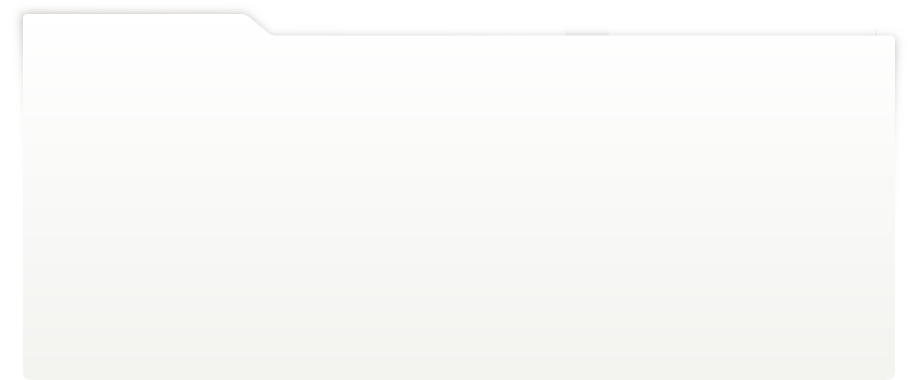
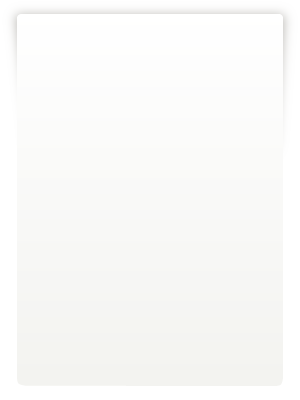
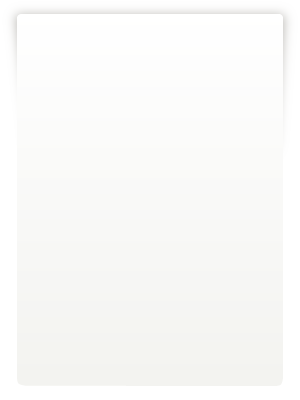
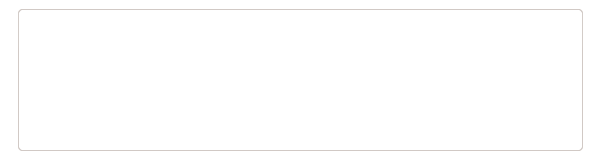
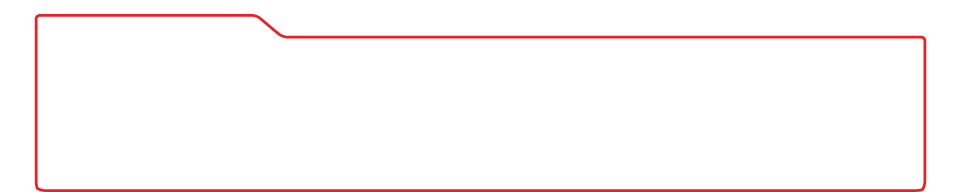
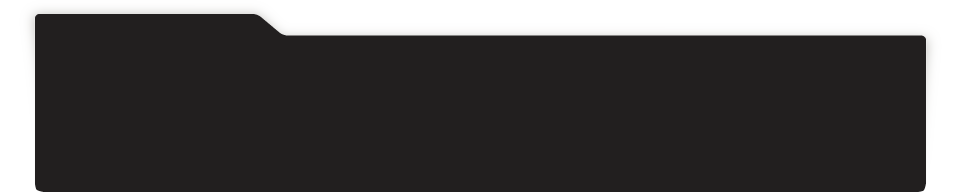
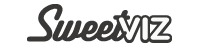
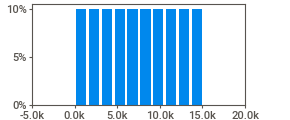
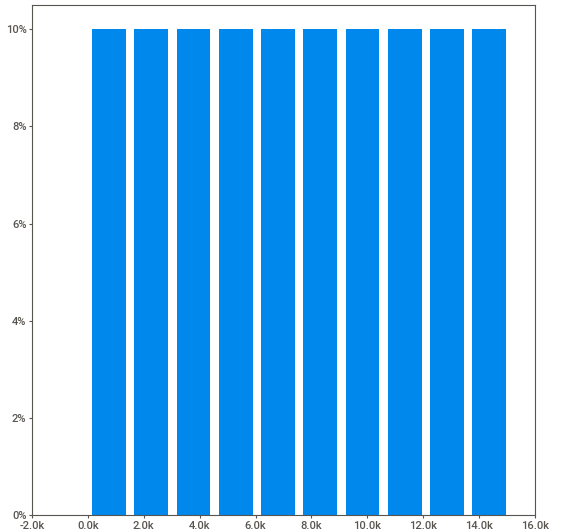
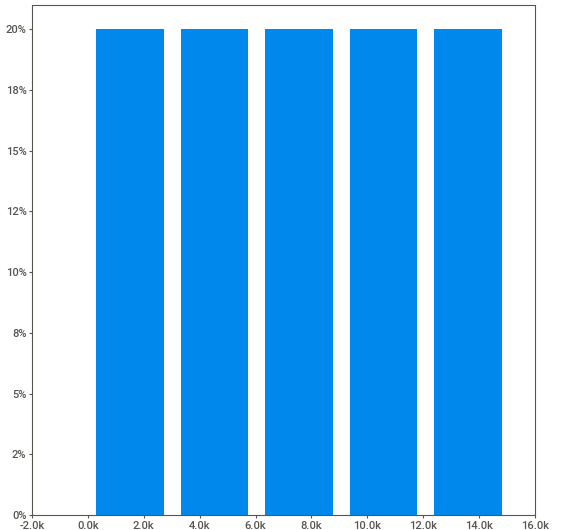
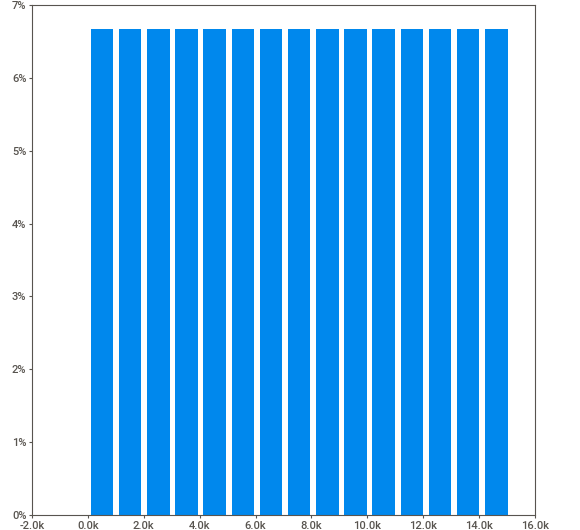
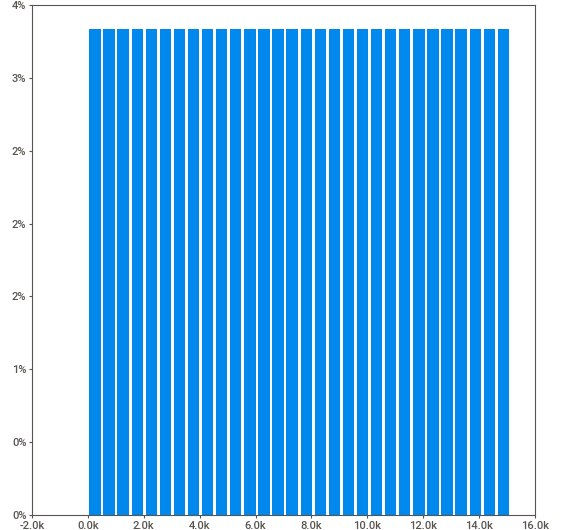
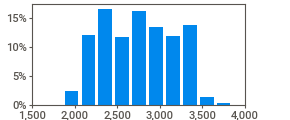
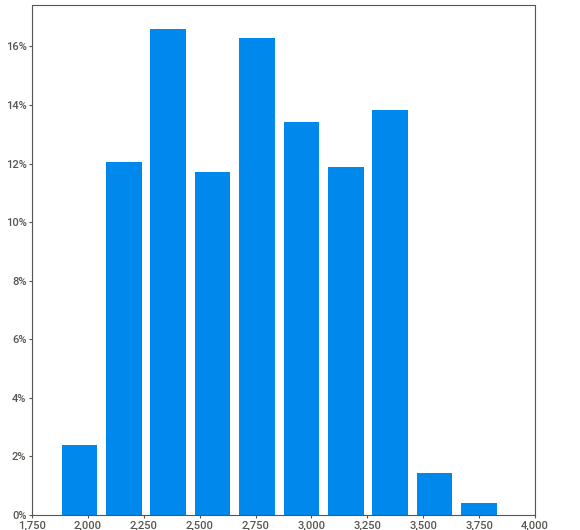
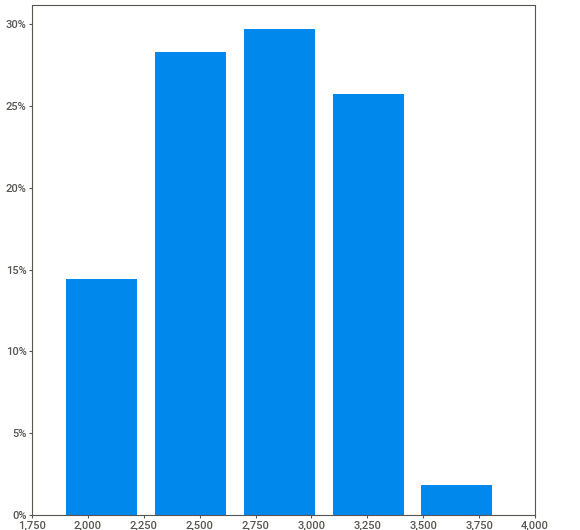
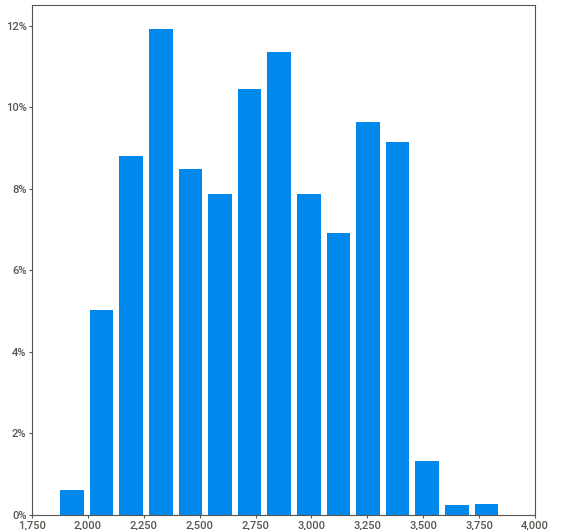
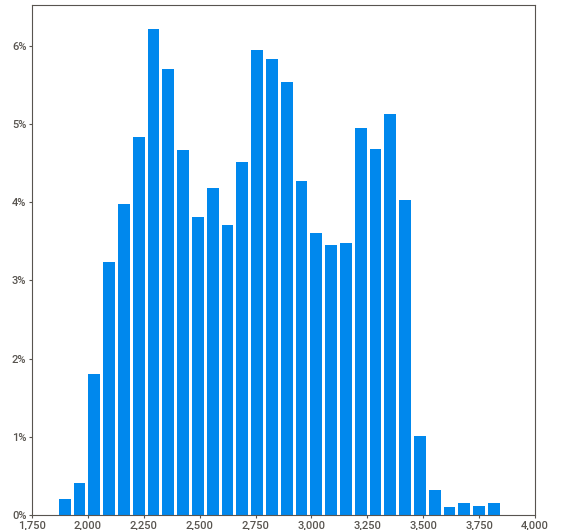
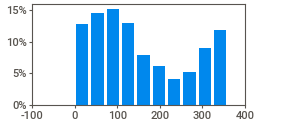
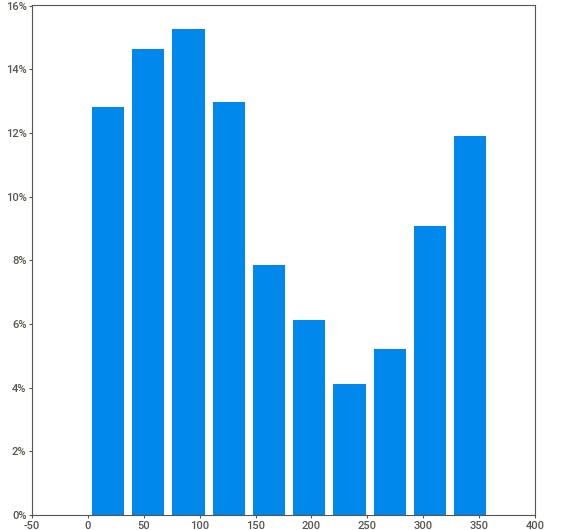
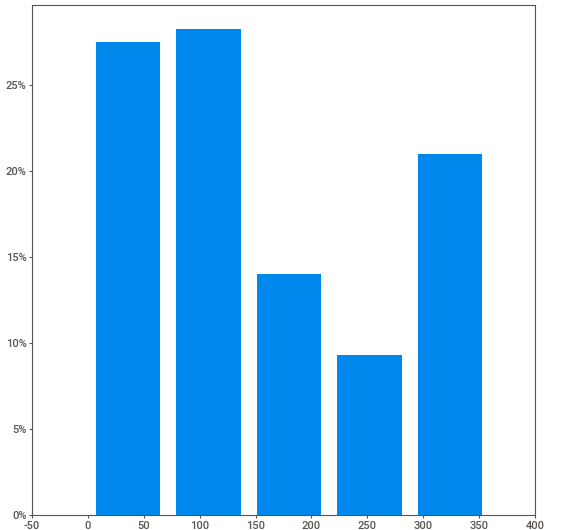
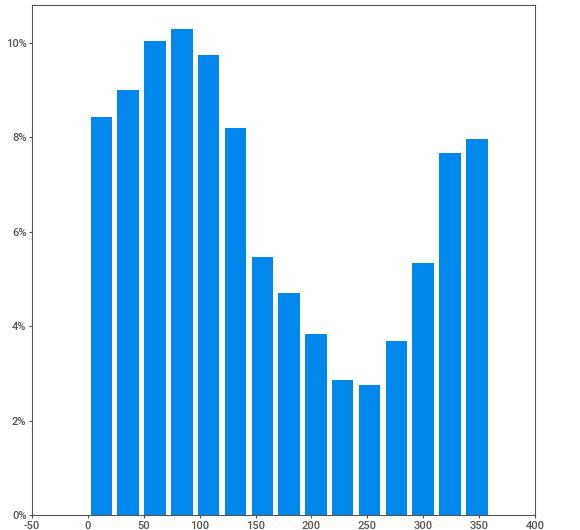
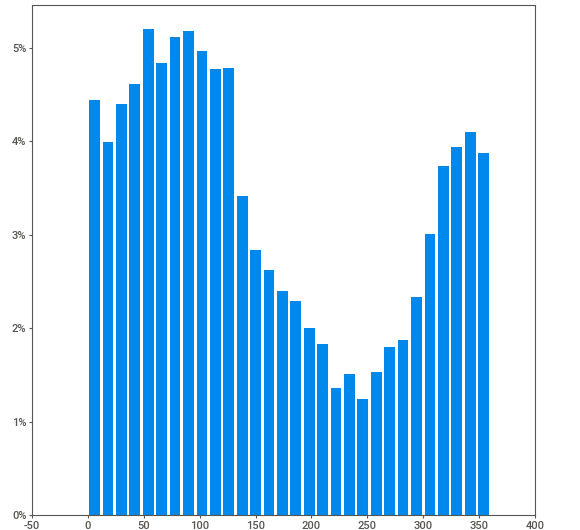
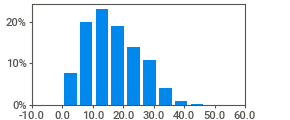
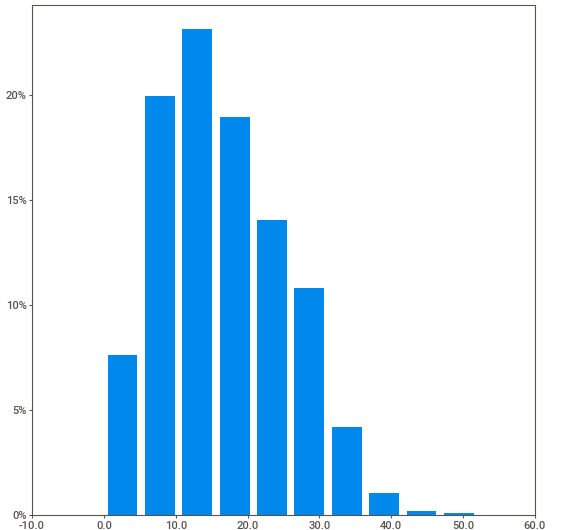
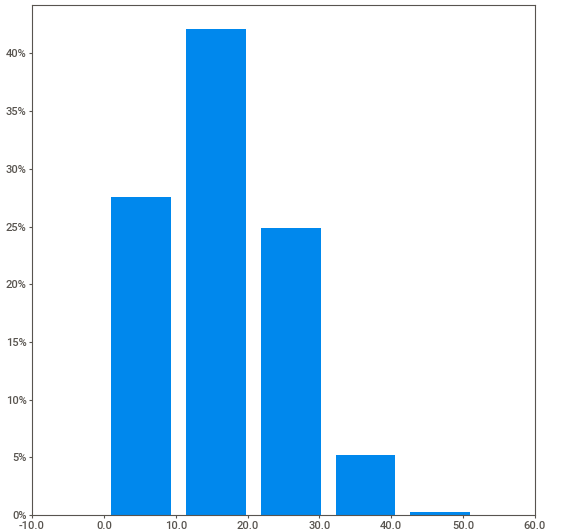
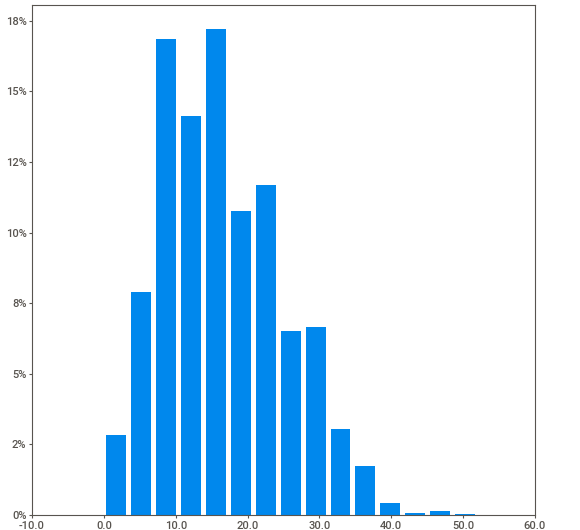
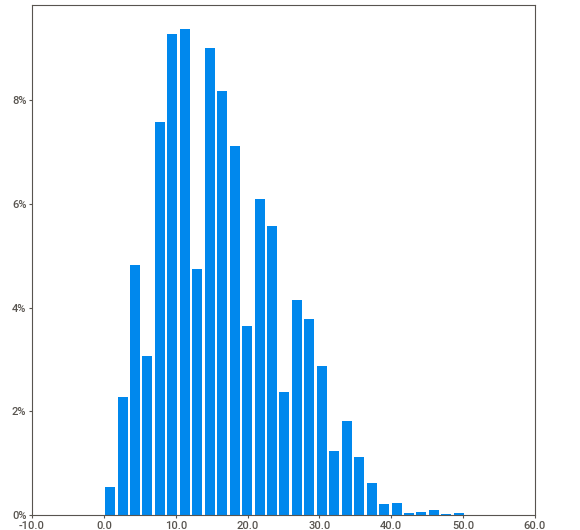
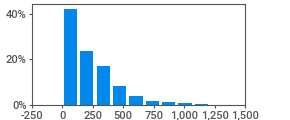
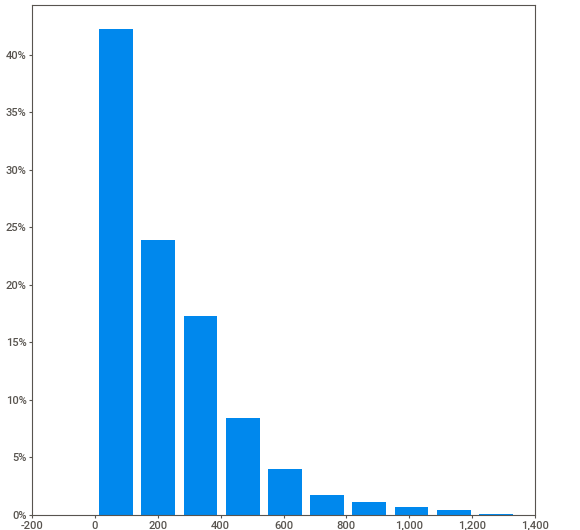
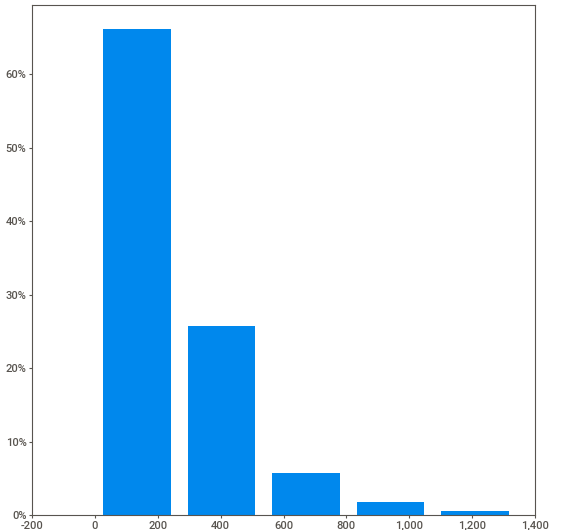
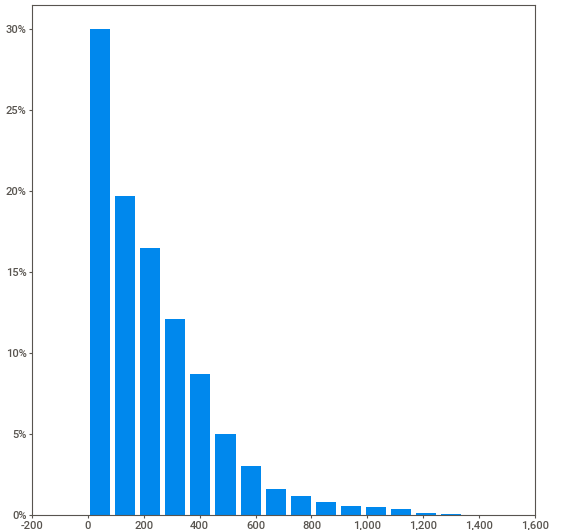
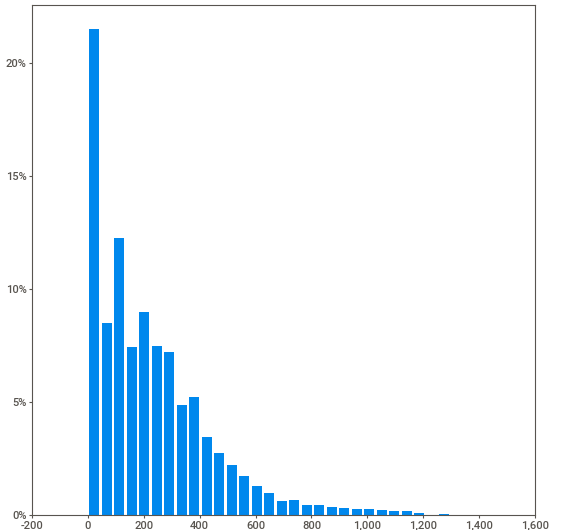
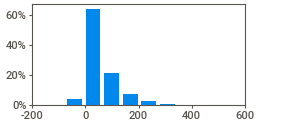
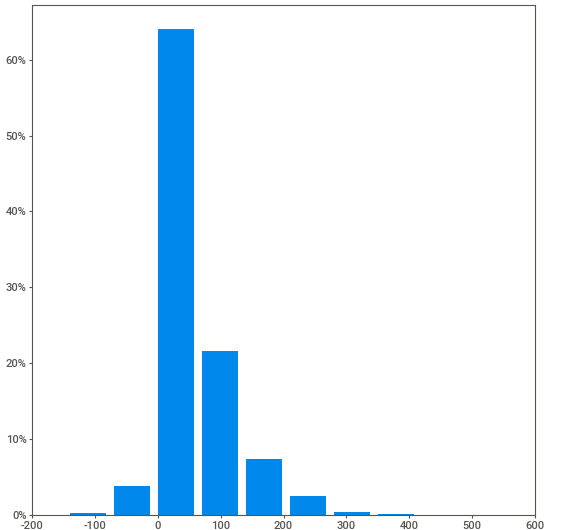
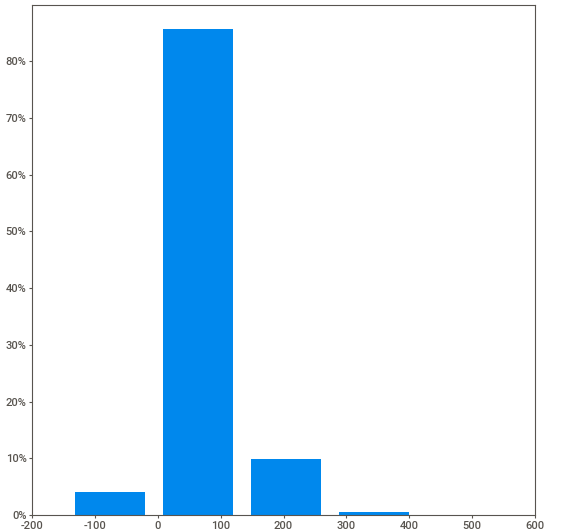
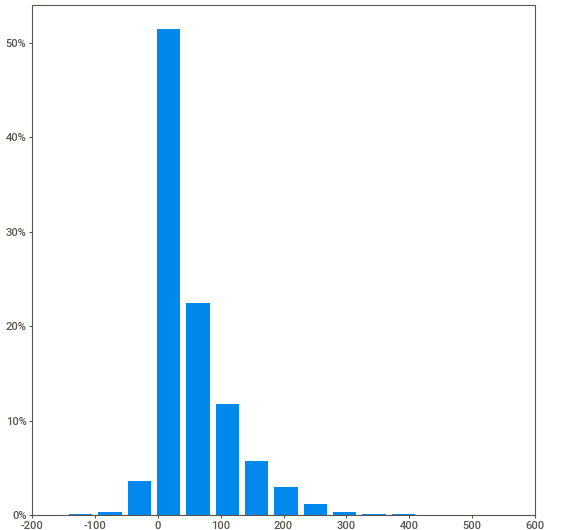
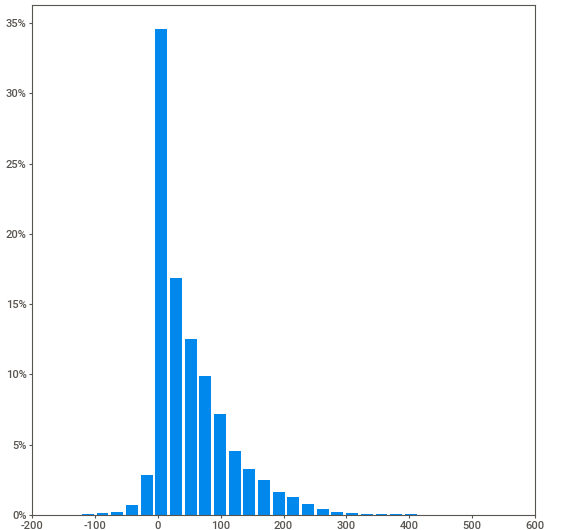
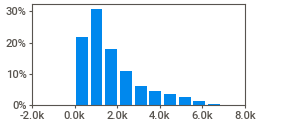
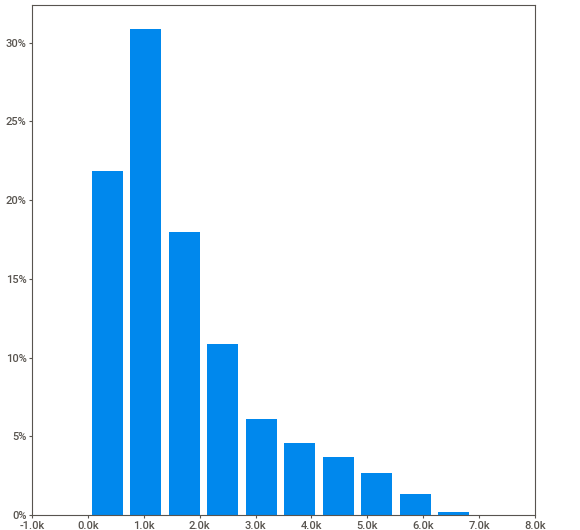
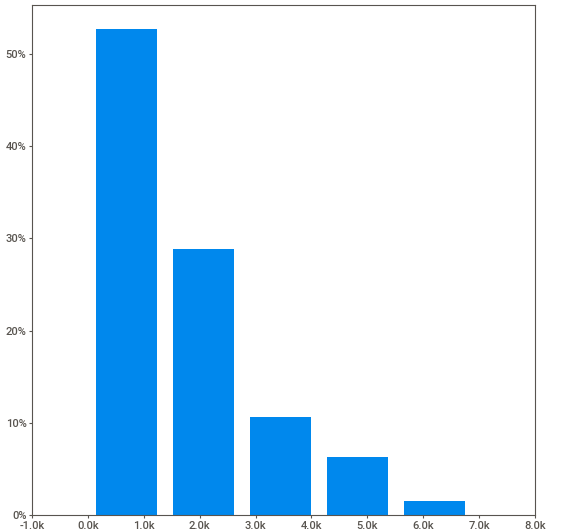
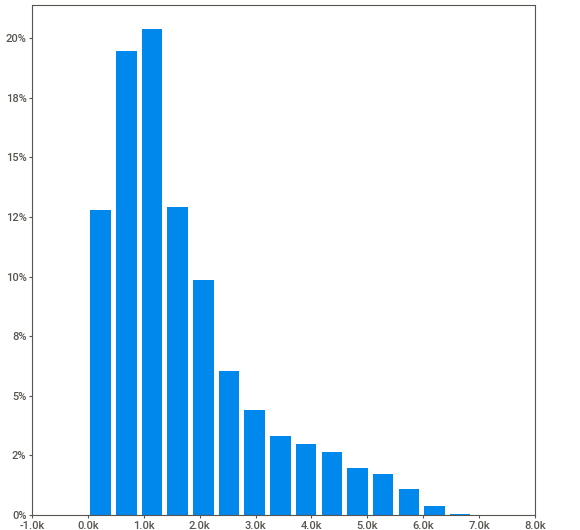
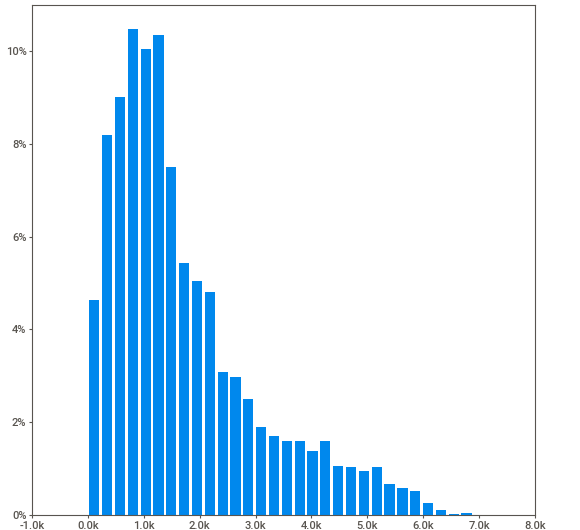
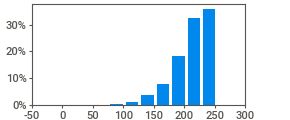
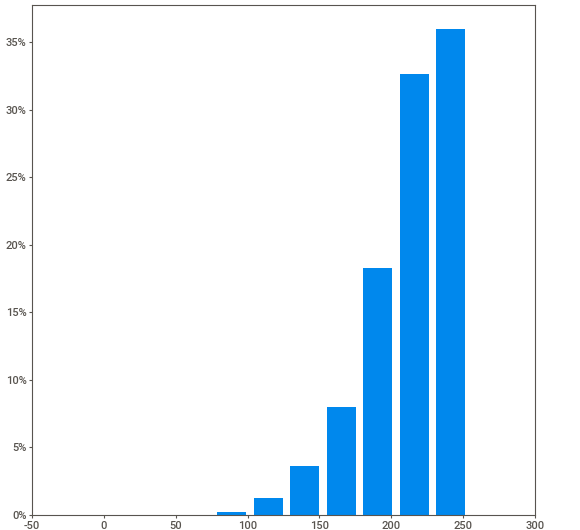
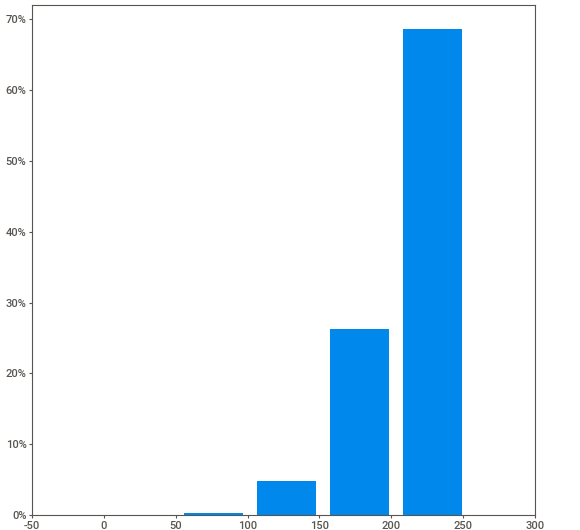
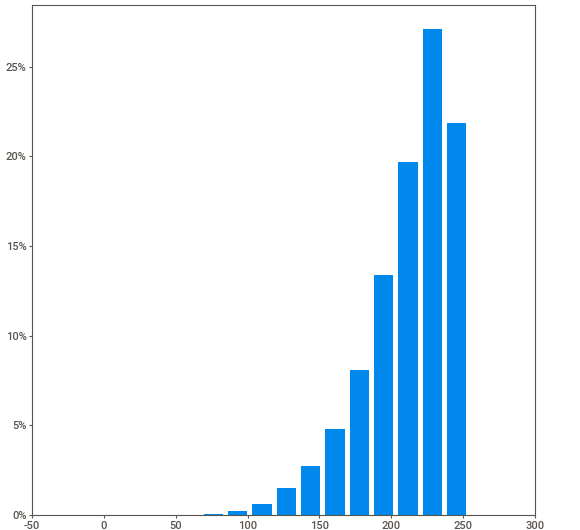
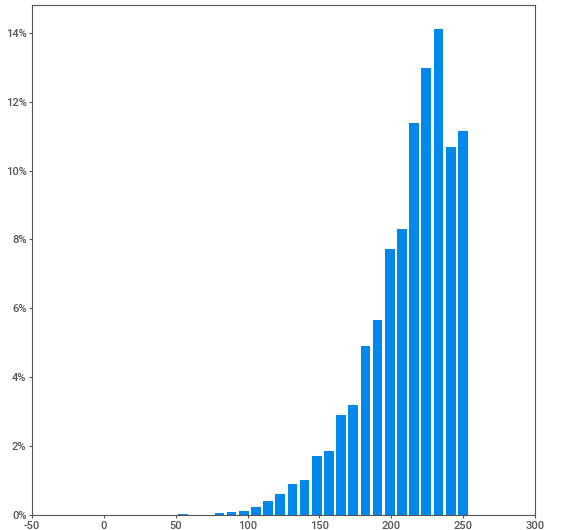
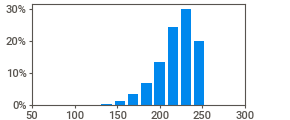
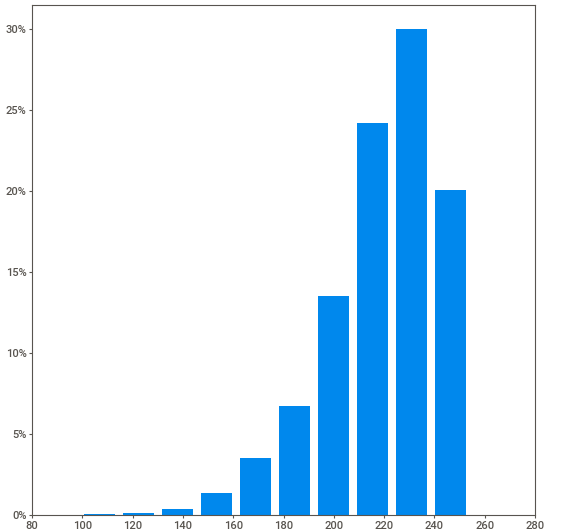
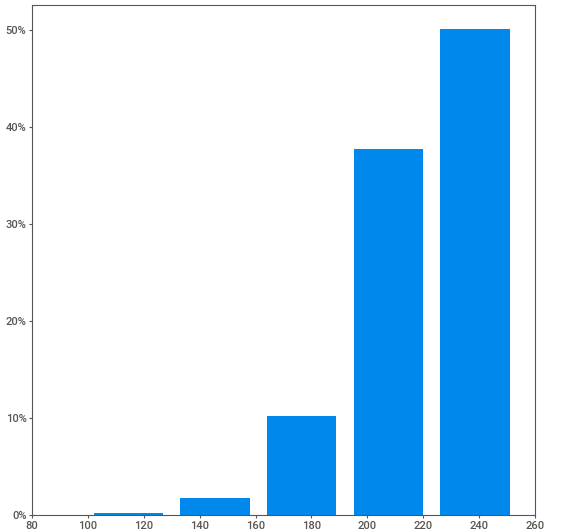
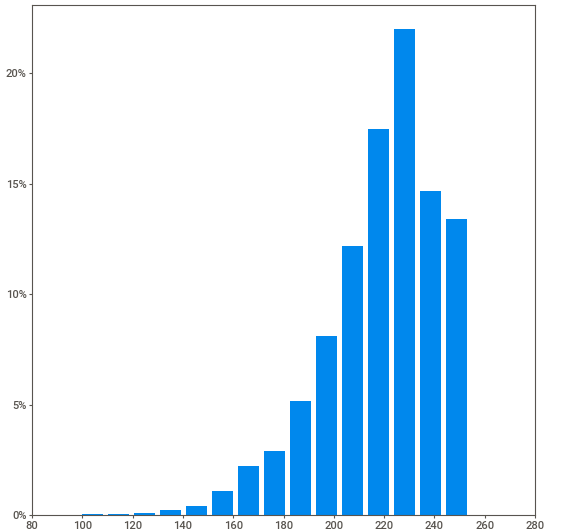
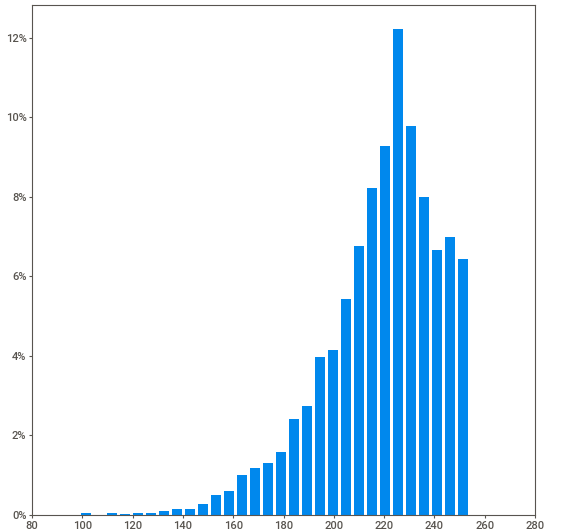
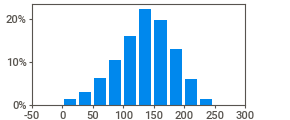
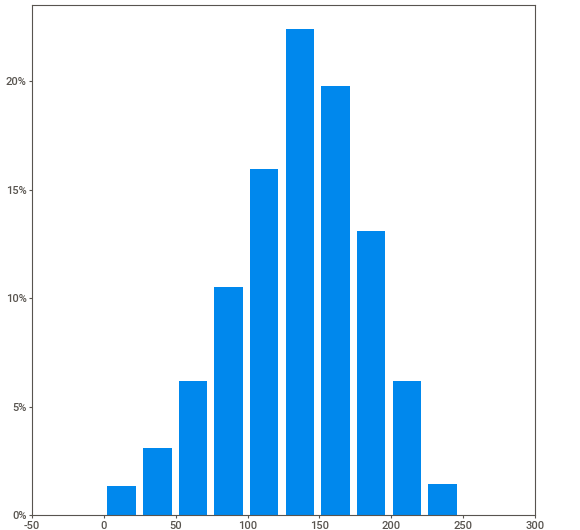
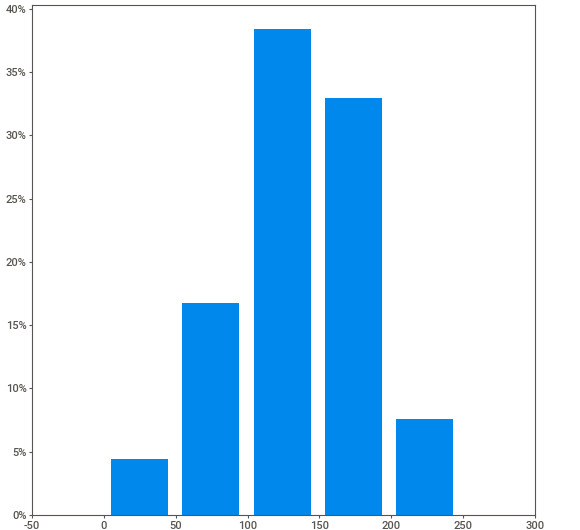
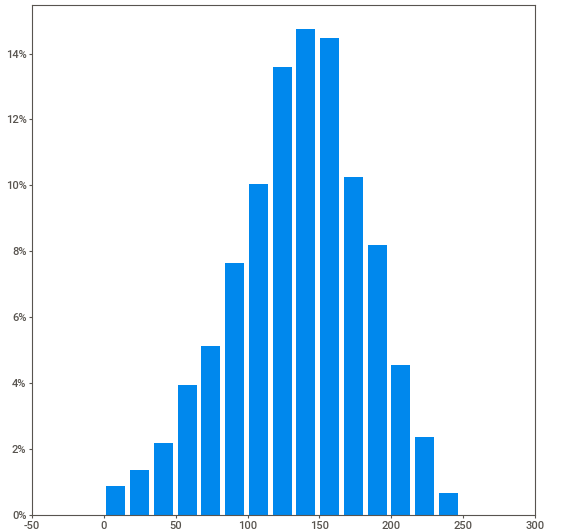
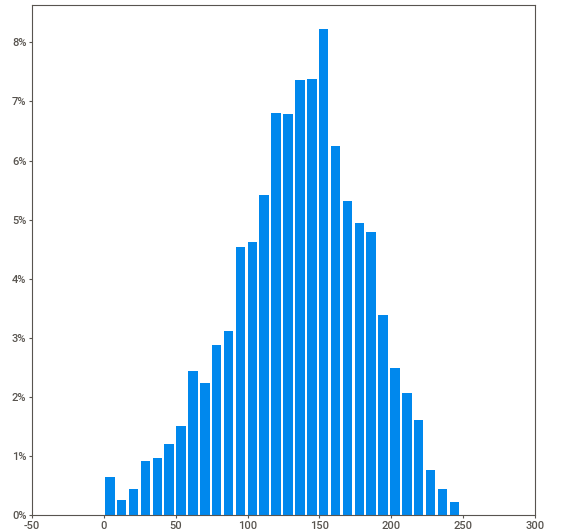
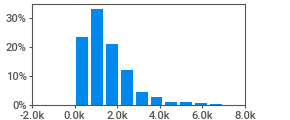
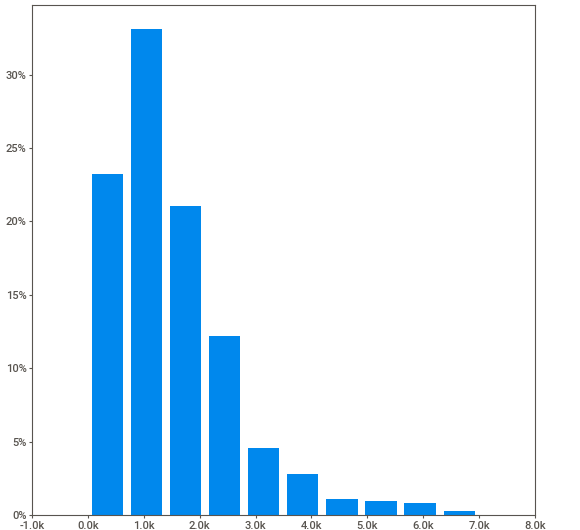
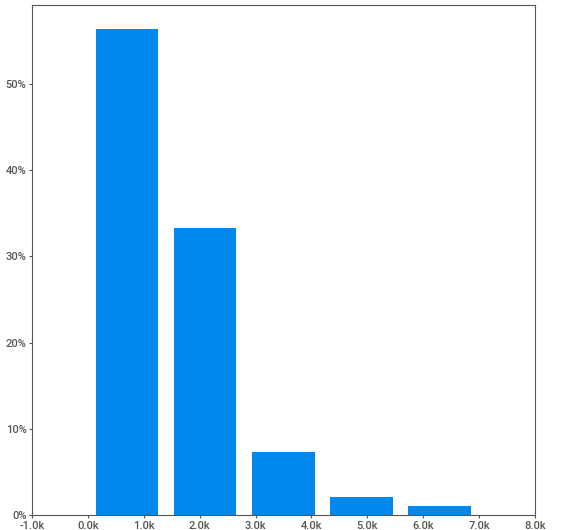
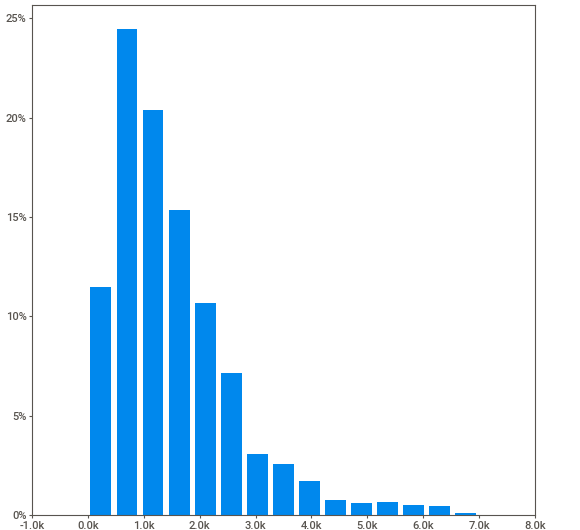
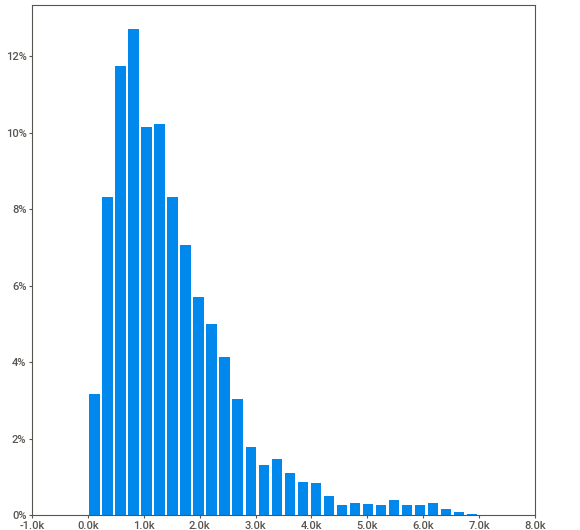
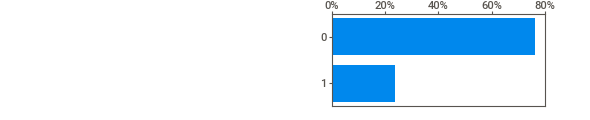
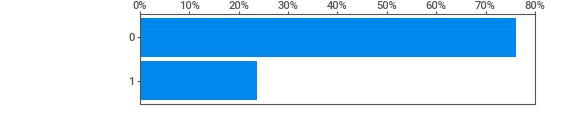
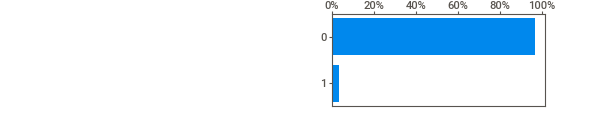
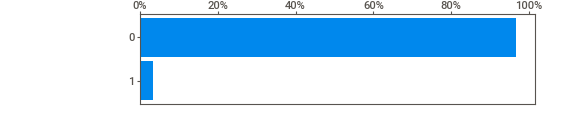
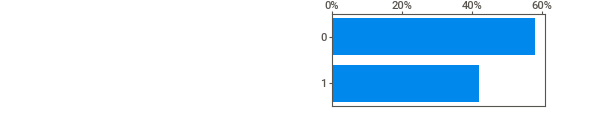
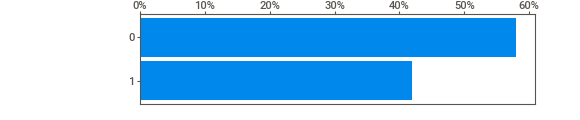
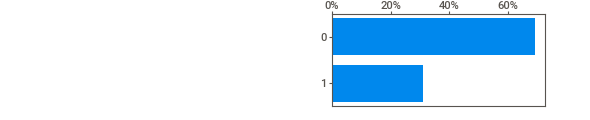
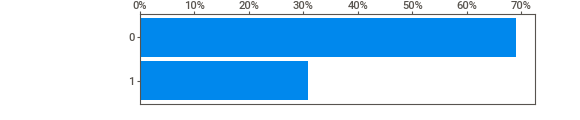
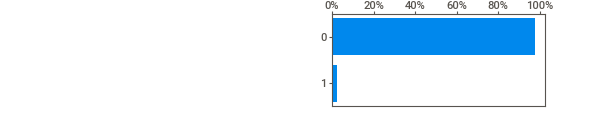
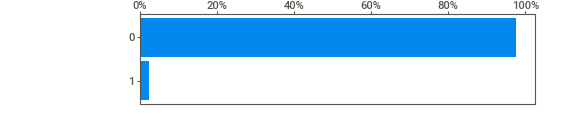
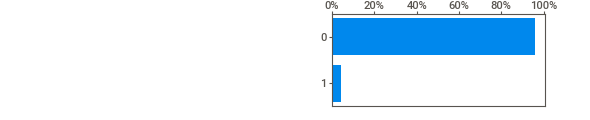
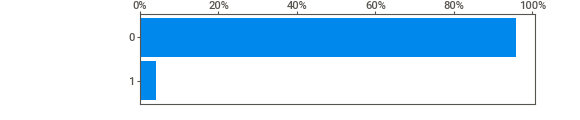
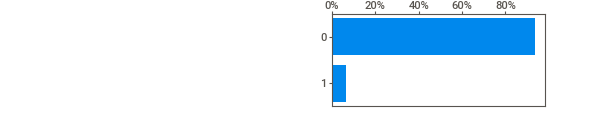
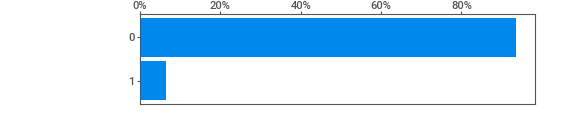
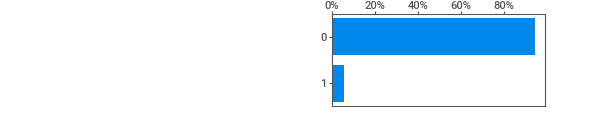
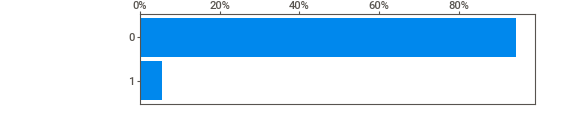
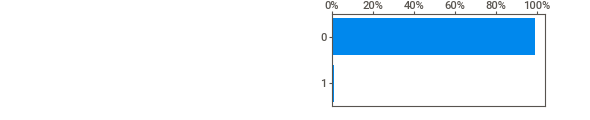
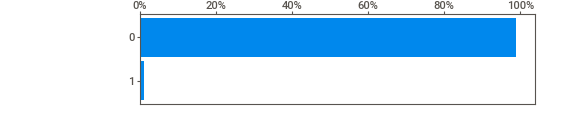
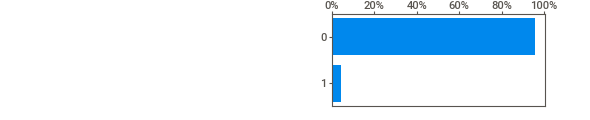
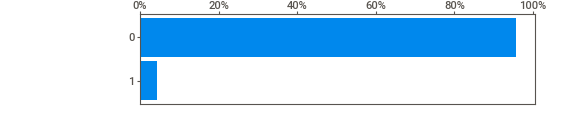
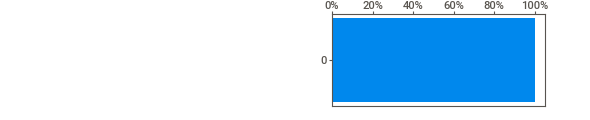
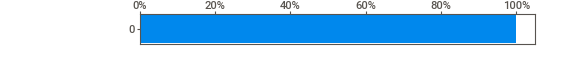
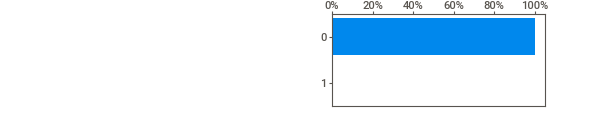
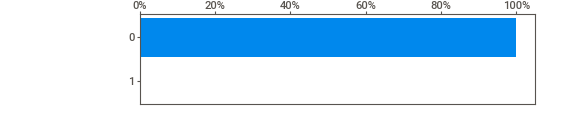
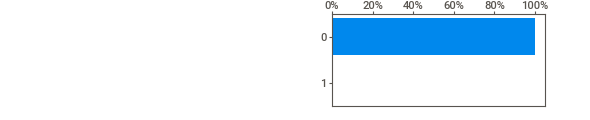
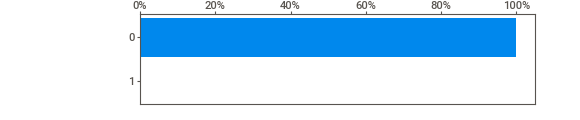
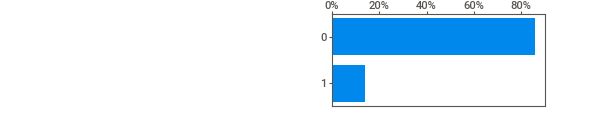
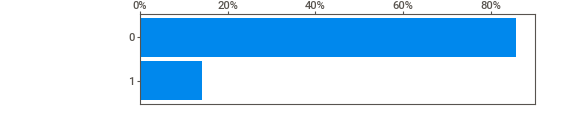
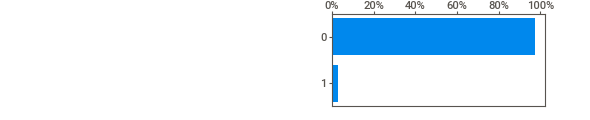
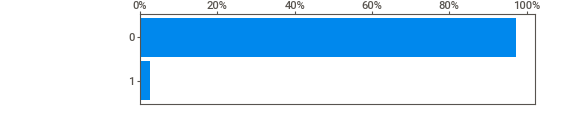
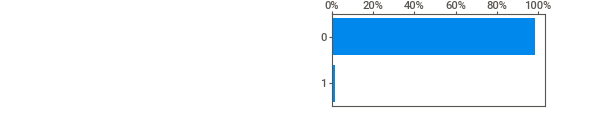
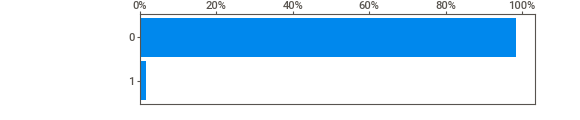
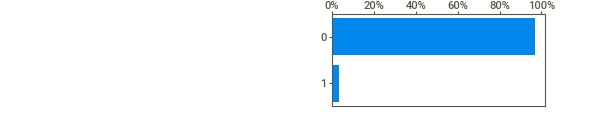
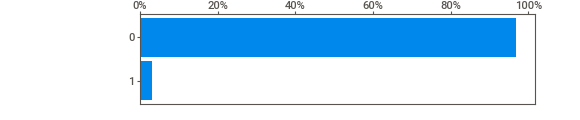
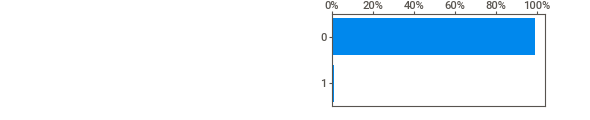
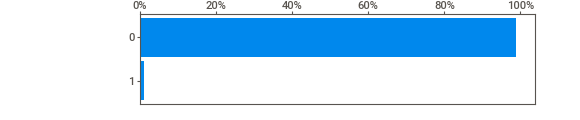
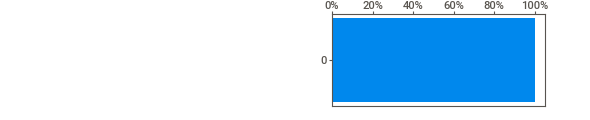
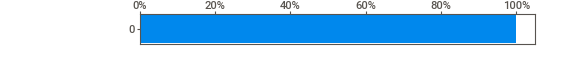
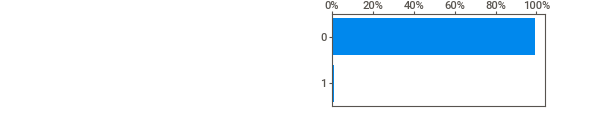
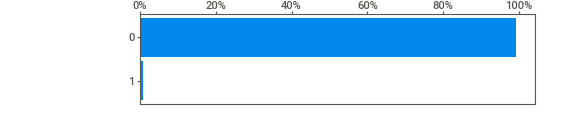
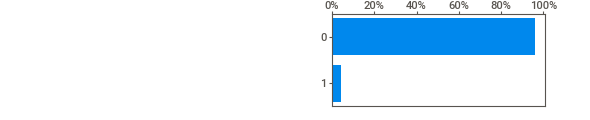
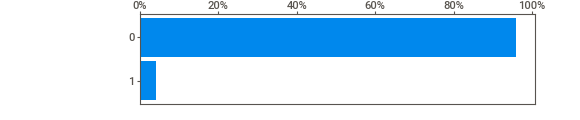
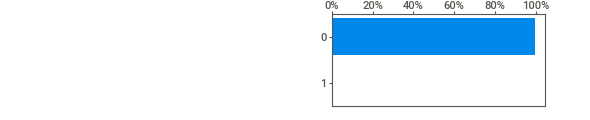
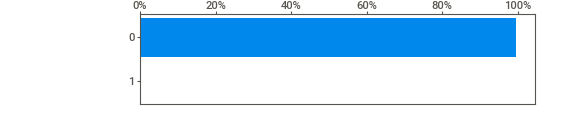
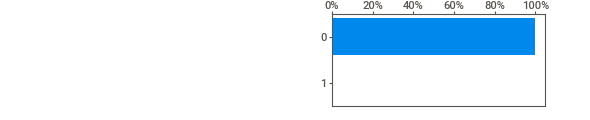
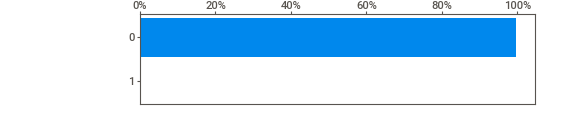
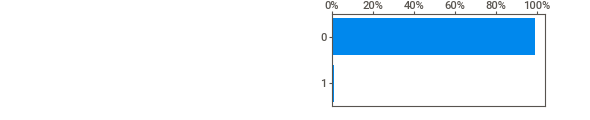
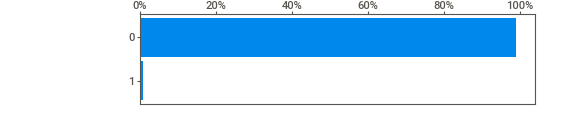
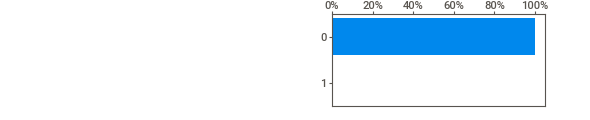
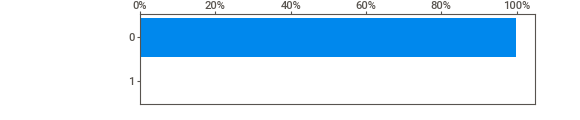
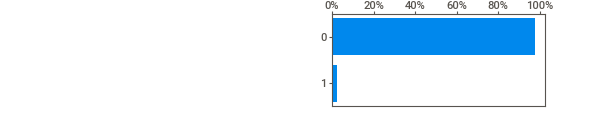
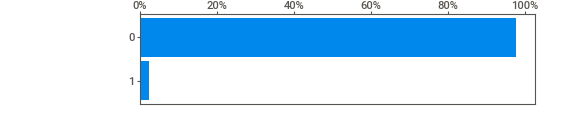
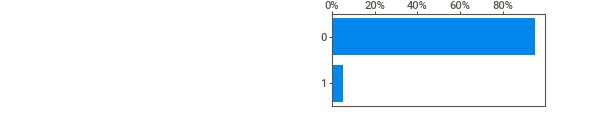
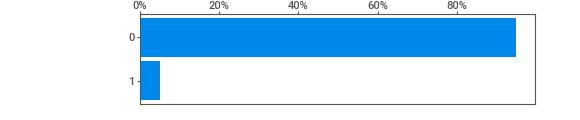
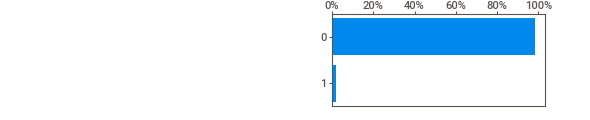
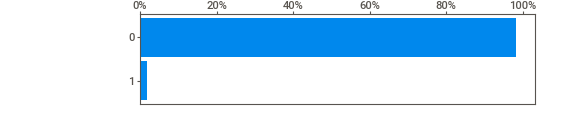
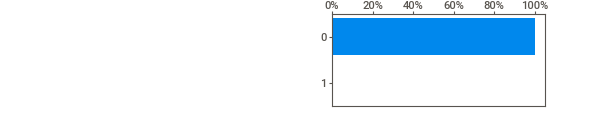
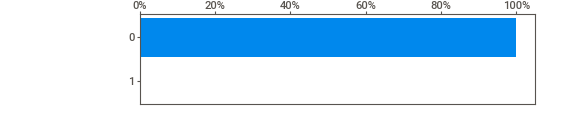
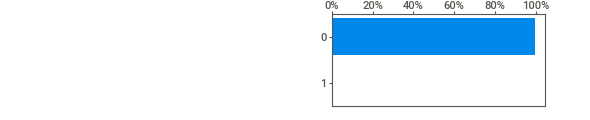
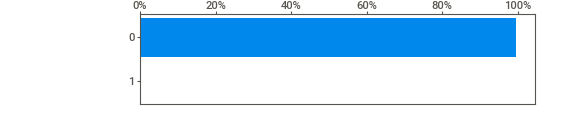
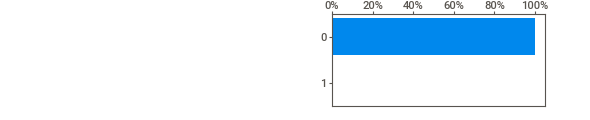
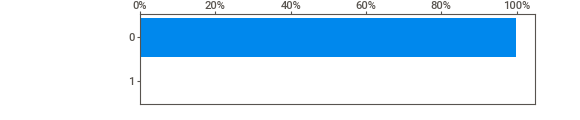
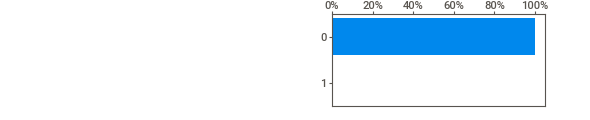
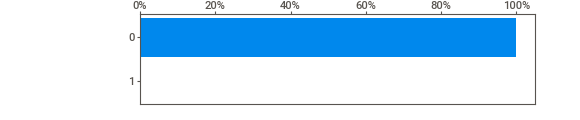
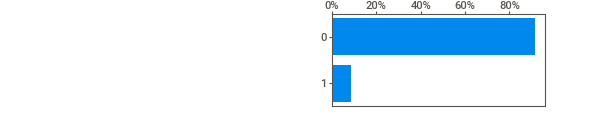
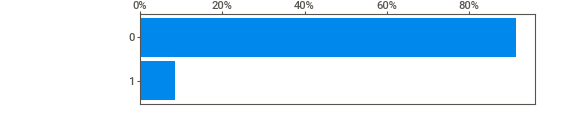
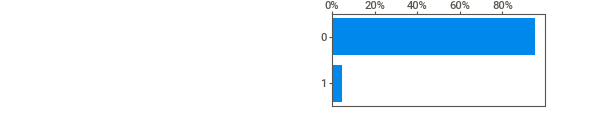
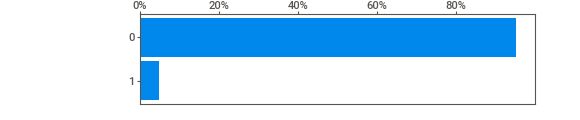
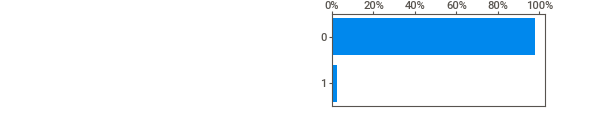
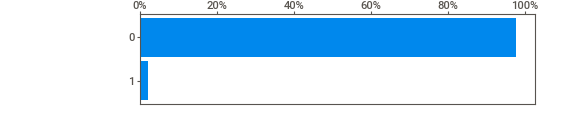
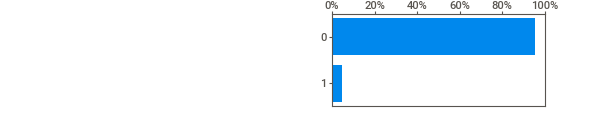
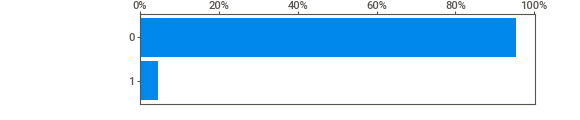
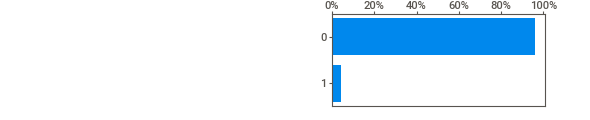
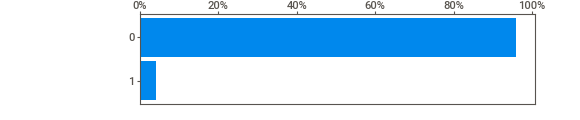
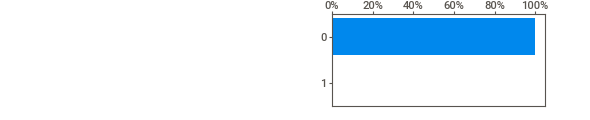
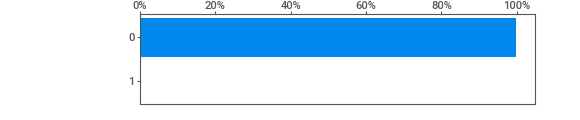
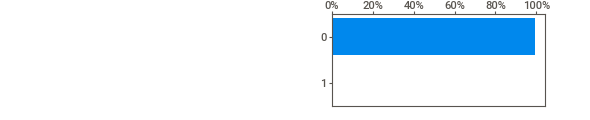
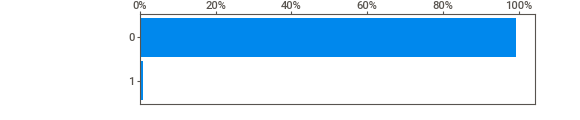
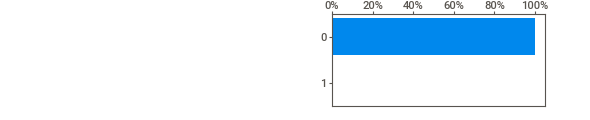
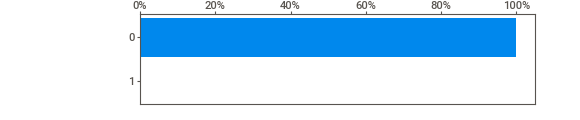
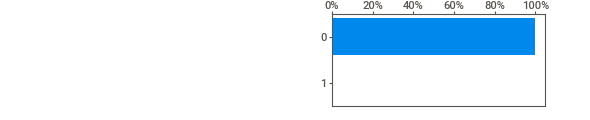
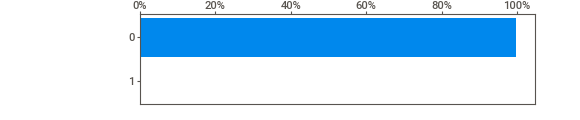
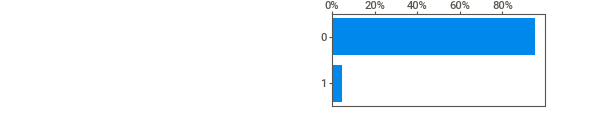
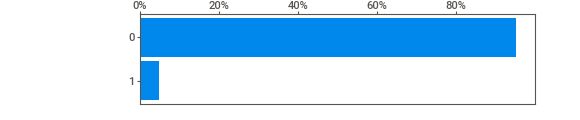
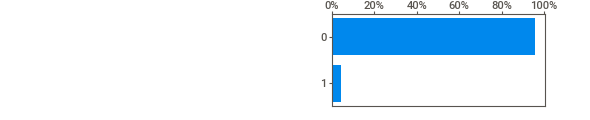
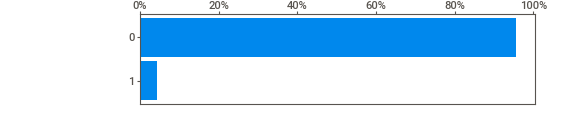
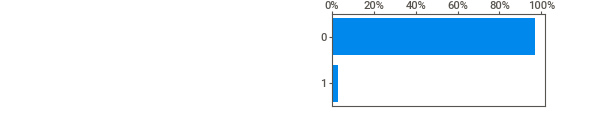
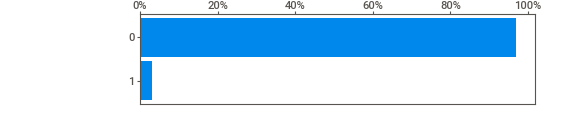
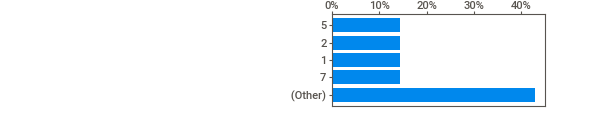
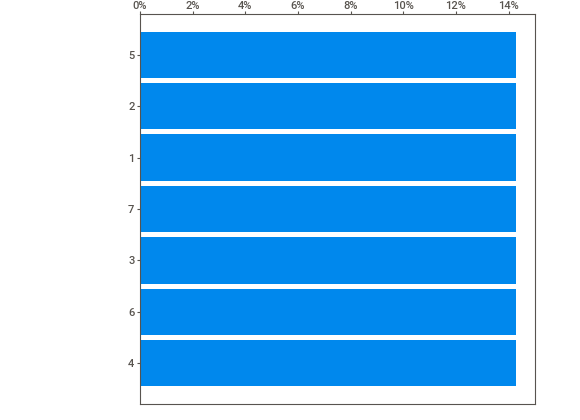
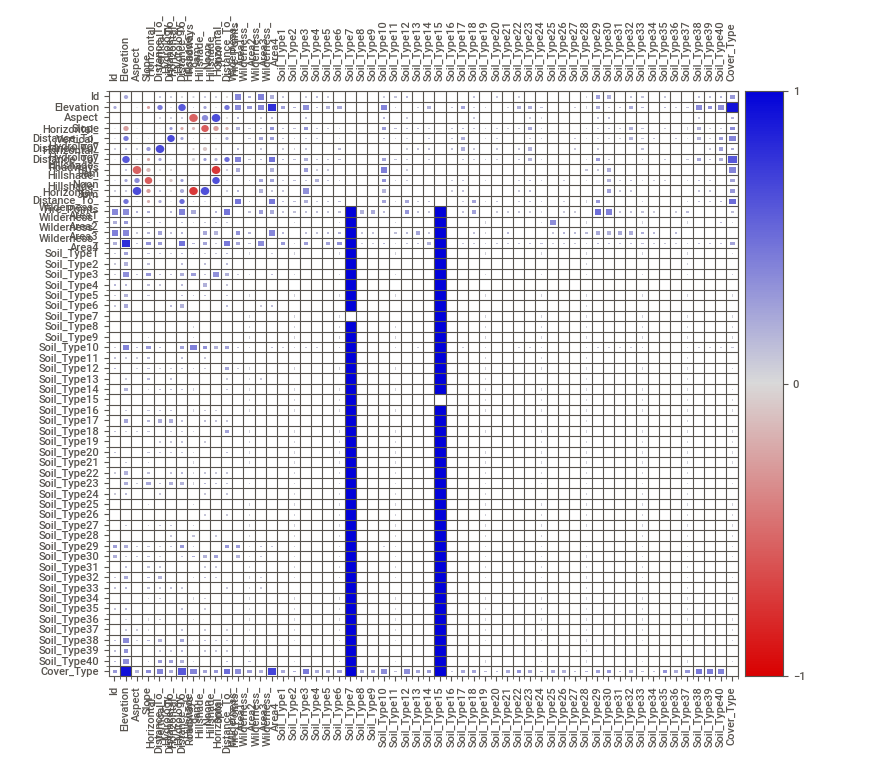
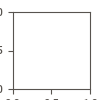

Report '/content/SWEETVIZ_REPORT.html' was saved to storage.


In [ ]:
my_report.show_notebook(w=None, h=None,scale=None,
                         layout='vertical',
                          filepath='/content/SWEETVIZ_REPORT.html')

* In 56 columns, 11 features are numerical and 45 are categorical.
* most numerical features are skewed
* Value 1 represent respective wilderness area
* Value 1 represent respective soil type



<Axes: xlabel='Cover_Type', ylabel='count'>

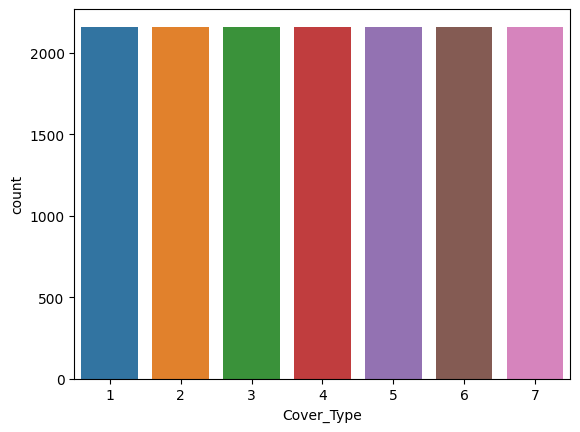

In [ ]:
sns.countplot(x=data['Cover_Type'])

* Data is balanced because target column having equal number of observations

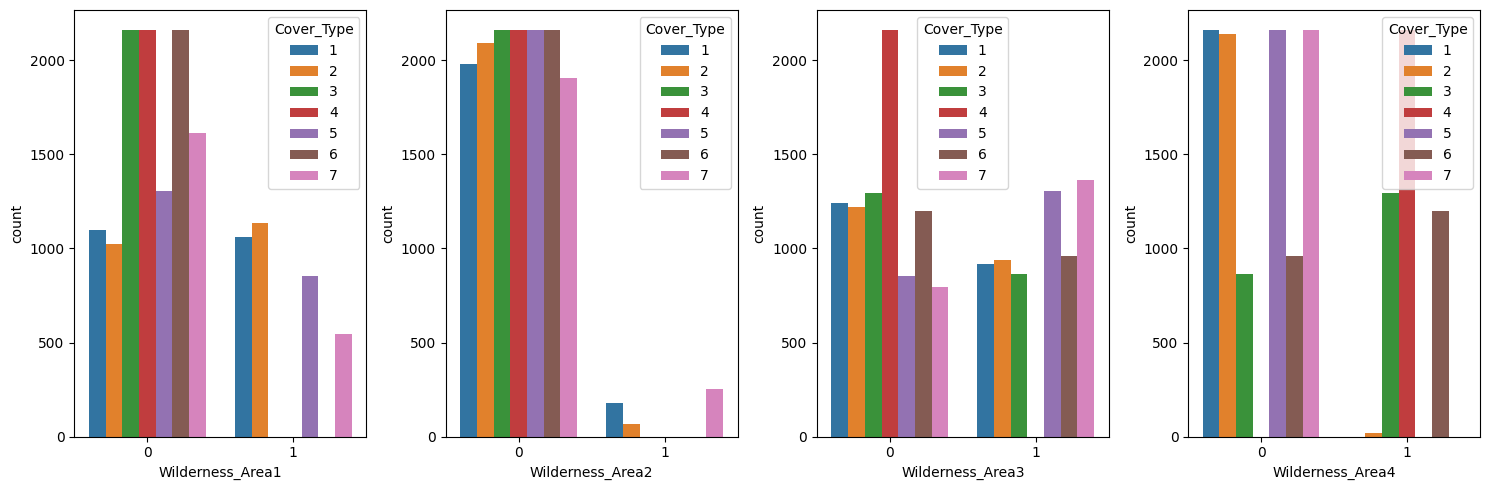

In [11]:
cols=data[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4' ]]
plt.figure(figsize=(15,5))
plt_num = 1
for i in cols:
  if plt_num <= 4:
        plt.subplot(1,4,plt_num)
        sns.countplot(x=i ,data=data,hue='Cover_Type')
  plt_num += 1
plt.tight_layout()
plt.show()


Above plot shows the distribution of cover type in 4 wilderness-area
* we can see covertypes 1,2,5,7 are in Widerness_area1.Mostly we can see 1 and 2
* in Widerness_area2 we can see covertypes 1,2,7; 7 has highest countin this region; from the figure we can see that it is a small region from all
* in Widerness_area3 we can see covertypes apart from 4 ; count of 5 and 7 are high in this region
* in Widerness_area4 we can see covertypes 2,3,4,6;Count of 4 is high and this cover type is onlt present in this region only


* we can see Cover_type 1,2,7 are present in wilderness_Area1,wilderness_Area2,wilderness_Area3
* covertype 5 is only present in wilderness_Area1 and wilderness_Area3
* covertype3 and 6 are present in wilderness_Area3 and wilderness_Area4
* covertype4 is only present wilderness_Area4


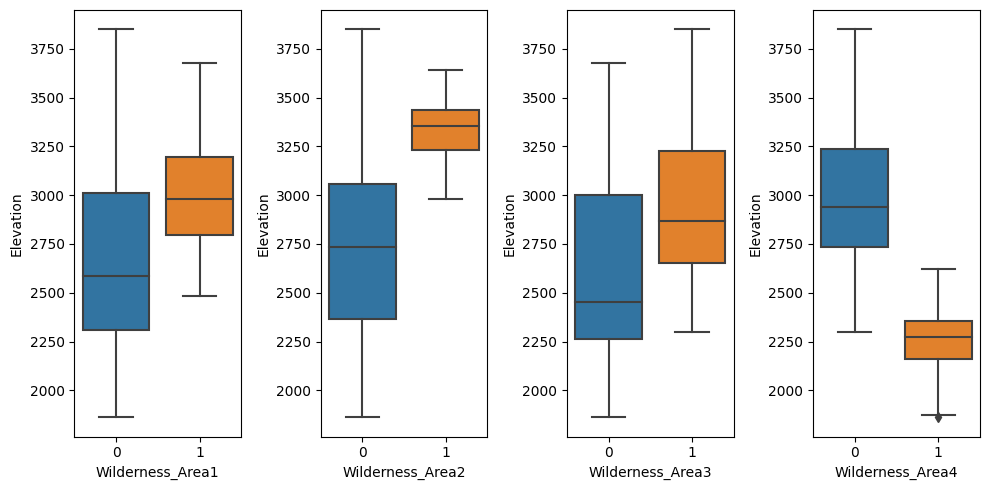

In [ ]:
cols=data[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4' ]]
plt.figure(figsize=(10,5))
plt_num = 1
for i in cols:
  if plt_num <= 4:
        plt.subplot(1,4,plt_num)
        sns.boxplot(data=data,x=i,y='Elevation')
  plt_num += 1

plt.tight_layout()
plt.show()

* Wilderness_Area4 has low elevation
* Wilderness_Area3 has high elevation and we can see wide variety of 6 types of
cover type in here
* Wilderness_Area2 is small region with elevation from 3000 to 3600


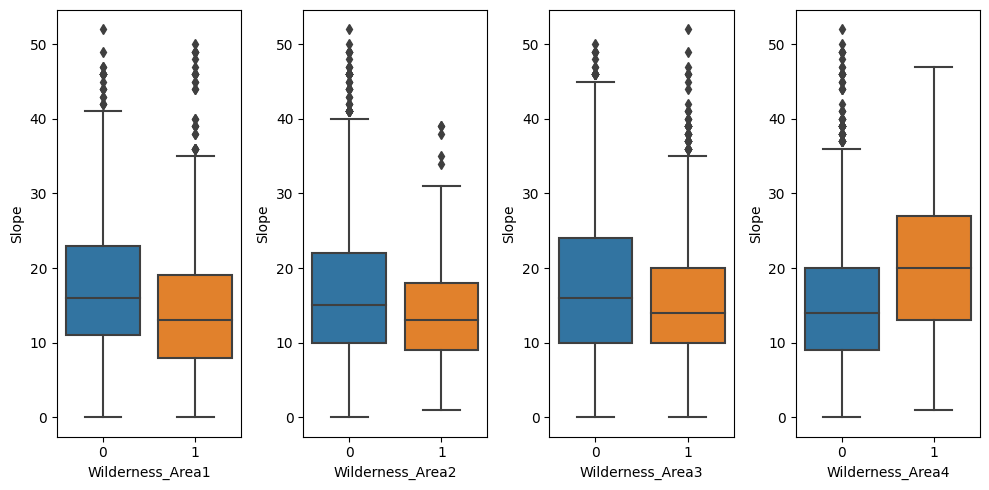

In [15]:
cols=data[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4' ]]
plt.figure(figsize=(10,5))
plt_num = 1
for i in cols:
  if plt_num <= 4:
        plt.subplot(1,4,plt_num)
        sns.boxplot(data=data,x=i,y='Slope')
  plt_num += 1

plt.tight_layout()
plt.show()

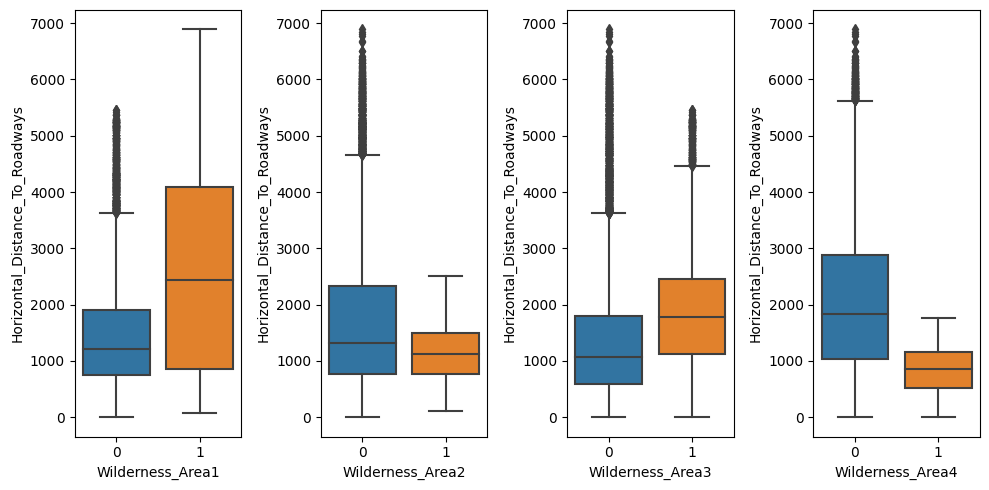

In [16]:
cols=data[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4' ]]
plt.figure(figsize=(10,5))
plt_num = 1
for i in cols:
  if plt_num <= 4:
        plt.subplot(1,4,plt_num)
        sns.boxplot(data=data,x=i,y='Horizontal_Distance_To_Roadways')
  plt_num += 1

plt.tight_layout()
plt.show()

* Wilderness area 4 and 2 are near to roadways


<Axes: xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

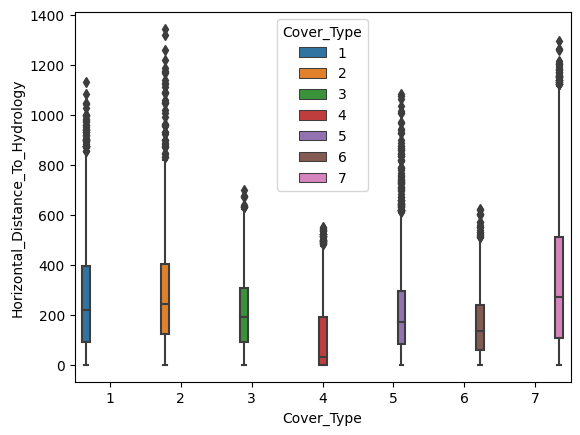

In [ ]:

sns.boxplot(data=data,y='Horizontal_Distance_To_Hydrology',x='Cover_Type',hue='Cover_Type')


<Axes: xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

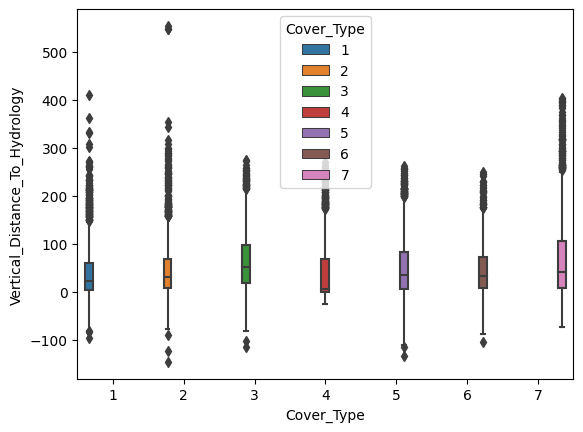

In [ ]:
sns.boxplot(data=data,x='Cover_Type',y='Vertical_Distance_To_Hydrology',hue='Cover_Type')

* Distance between the cover type and waterbodies cover type 7 is having longest distance from the water body
* outliers are present in Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Hydrology

<Axes: xlabel='Cover_Type', ylabel='Elevation'>

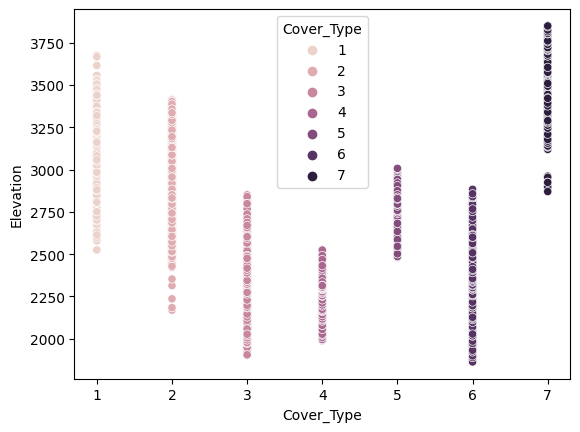

In [ ]:
sns.scatterplot(data=data,x='Cover_Type',y='Elevation',hue='Cover_Type')

* Cover_type is depended on elevation.we can see that the change in cover type according to elevation

<Axes: xlabel='Cover_Type', ylabel='Aspect'>

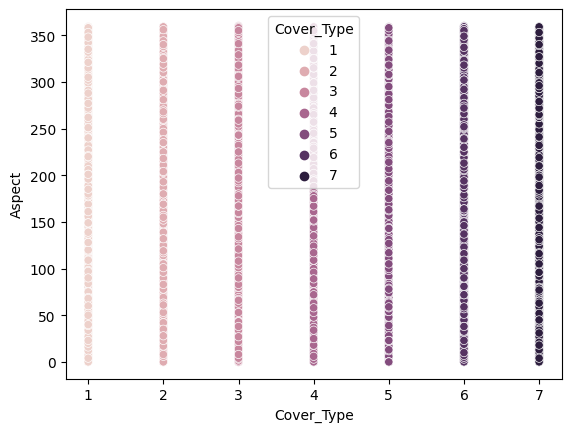

In [ ]:
sns.scatterplot(data=data,x='Cover_Type',y='Aspect',hue='Cover_Type')

<Axes: xlabel='Cover_Type', ylabel='Slope'>

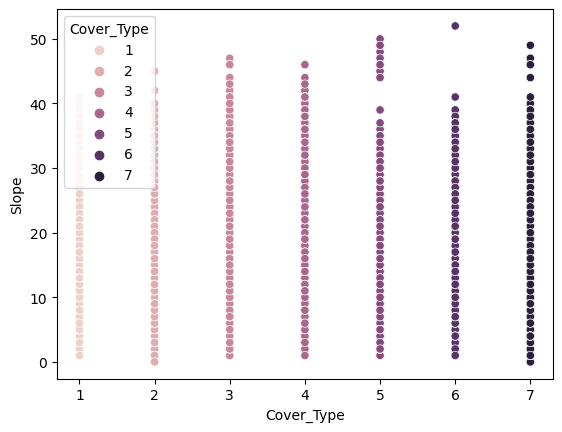

In [ ]:
sns.scatterplot(data=data,x='Cover_Type',y='Slope',hue='Cover_Type')

* Aspect, slope has no influence on covertype

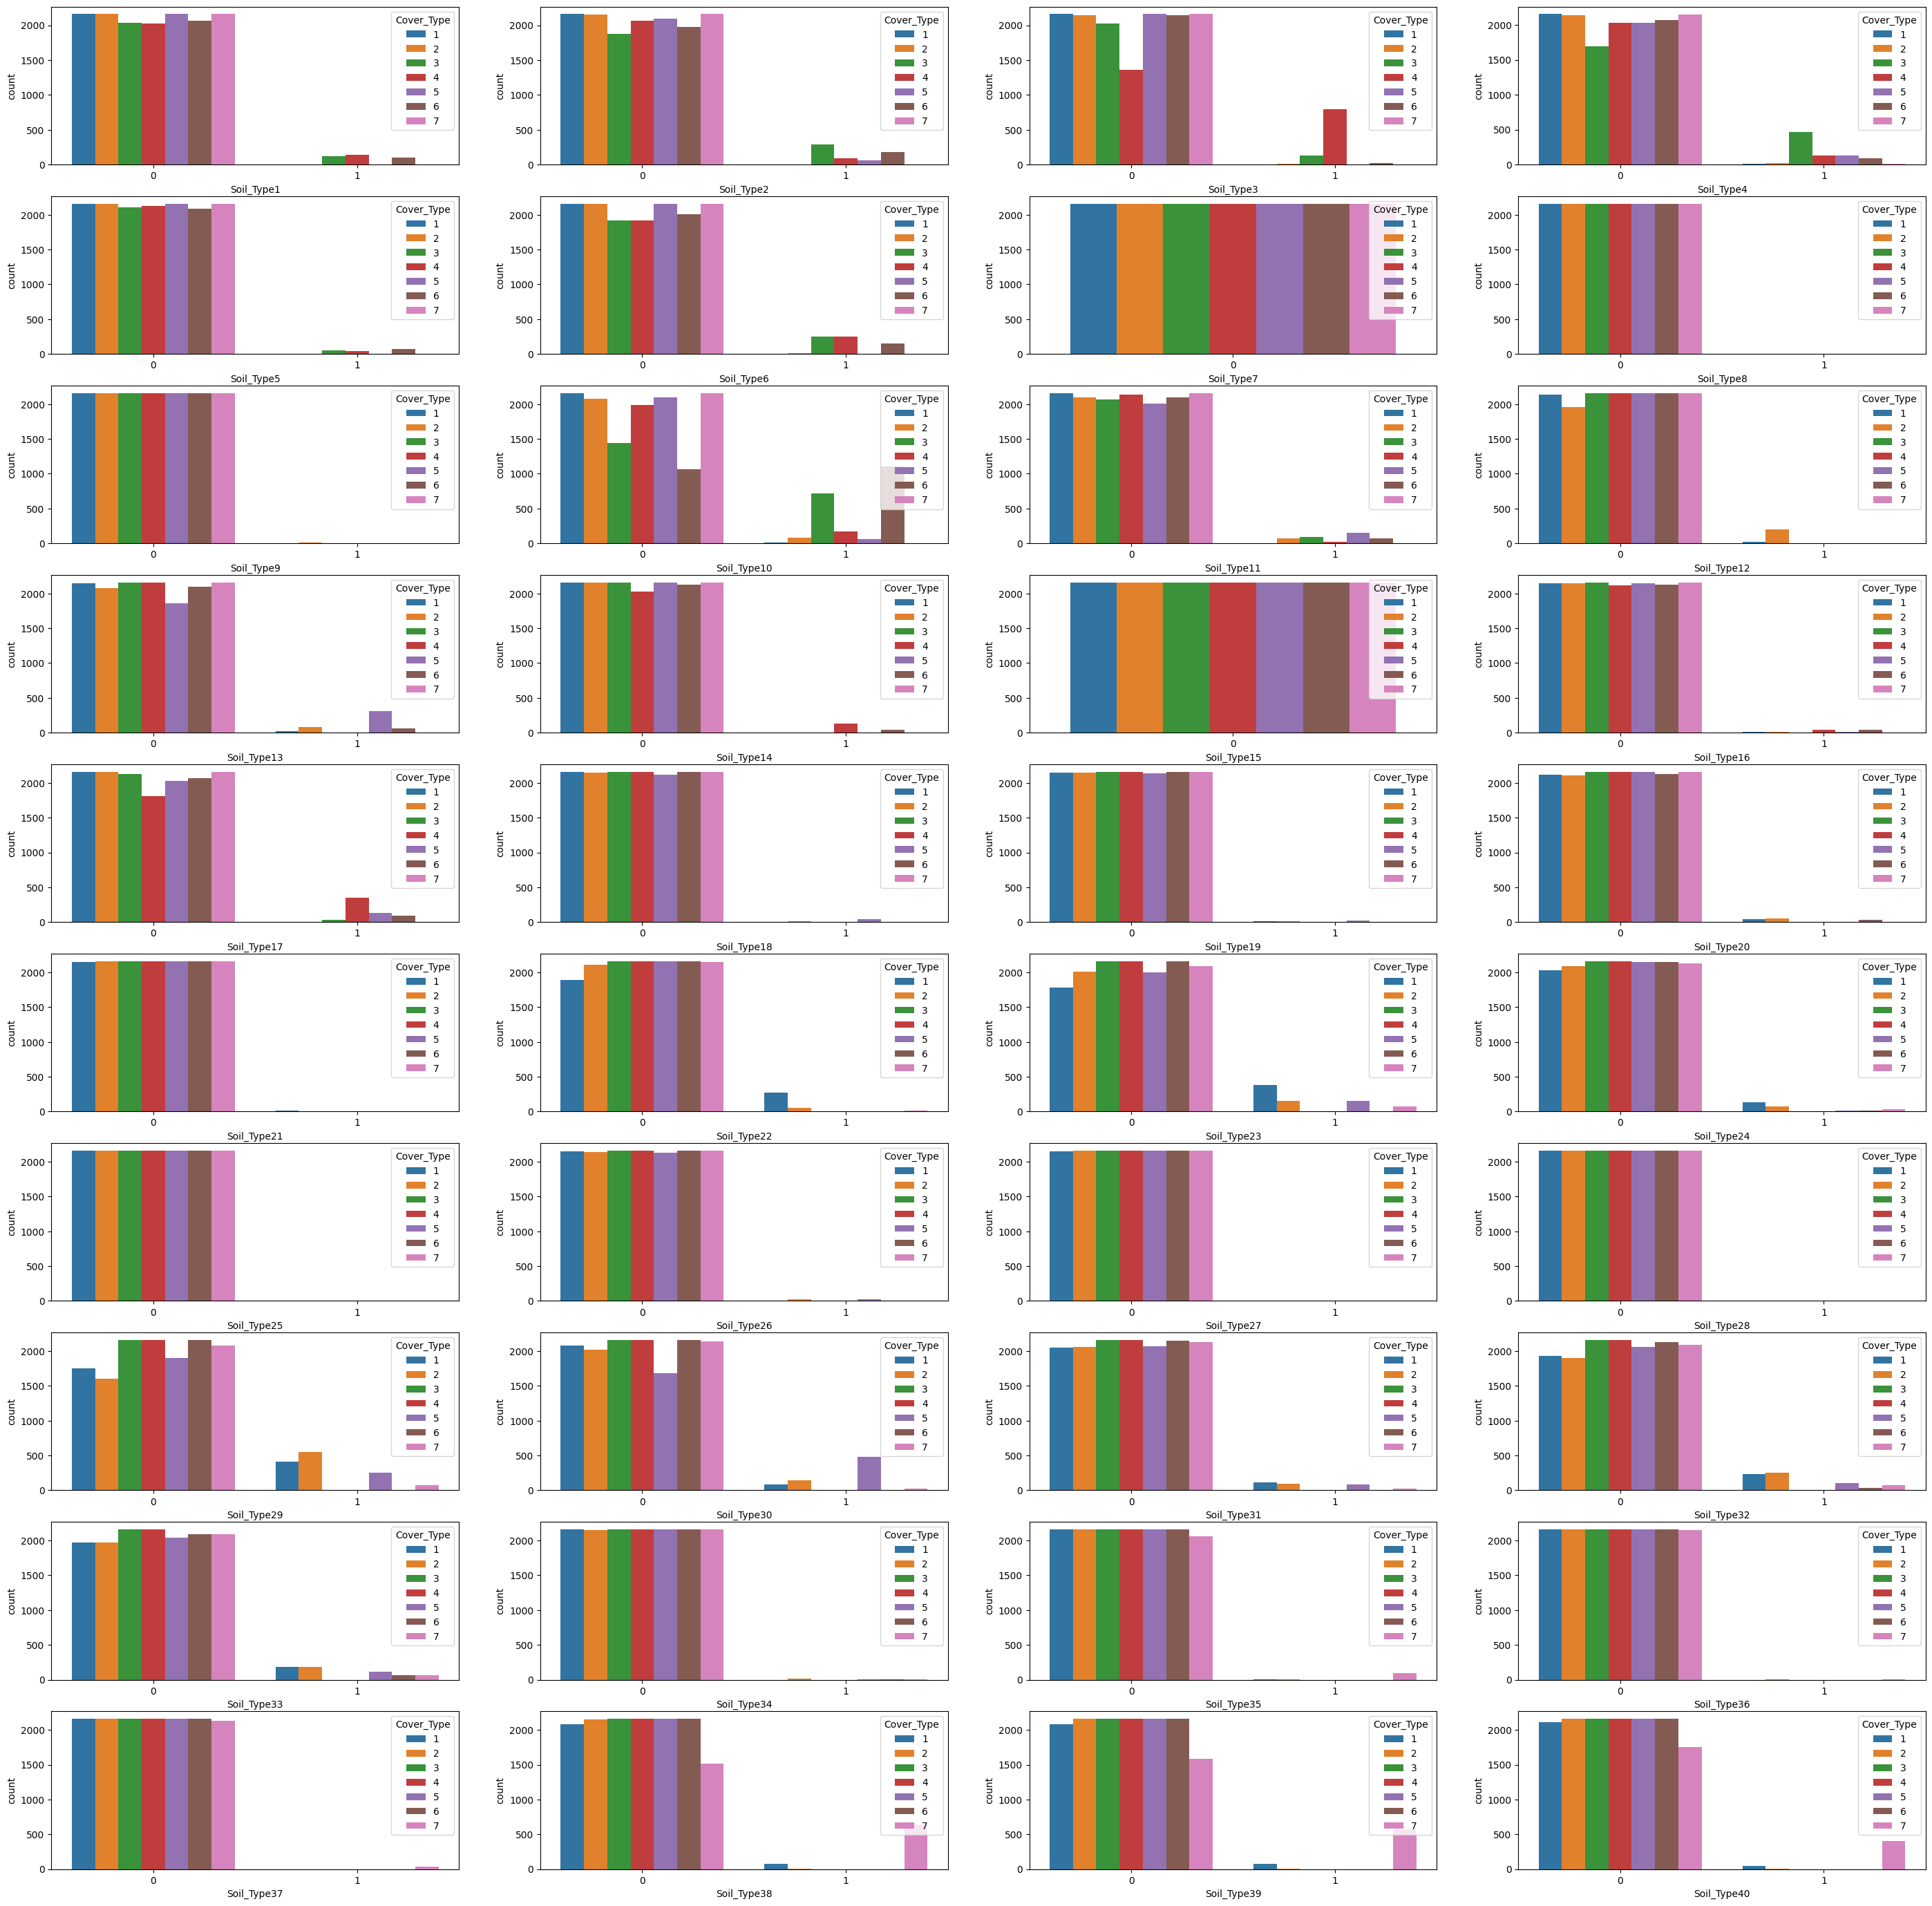

<Figure size 640x480 with 0 Axes>

In [ ]:
cols=data[['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']]
plt.figure(figsize=(35,35))
plt_num = 1
for i in cols:
  if plt_num <= 40:
        plt.subplot(10,4,plt_num)
        sns.countplot(x=i ,data=data,hue='Cover_Type')
  plt_num += 1
plt.show()
plt.tight_layout()

in above graph we can see the soil types for the cover types

# Data preprocessing

* There is no missing values,duplicates and object categories are present in data
* Data is balanced

--> outlier handling

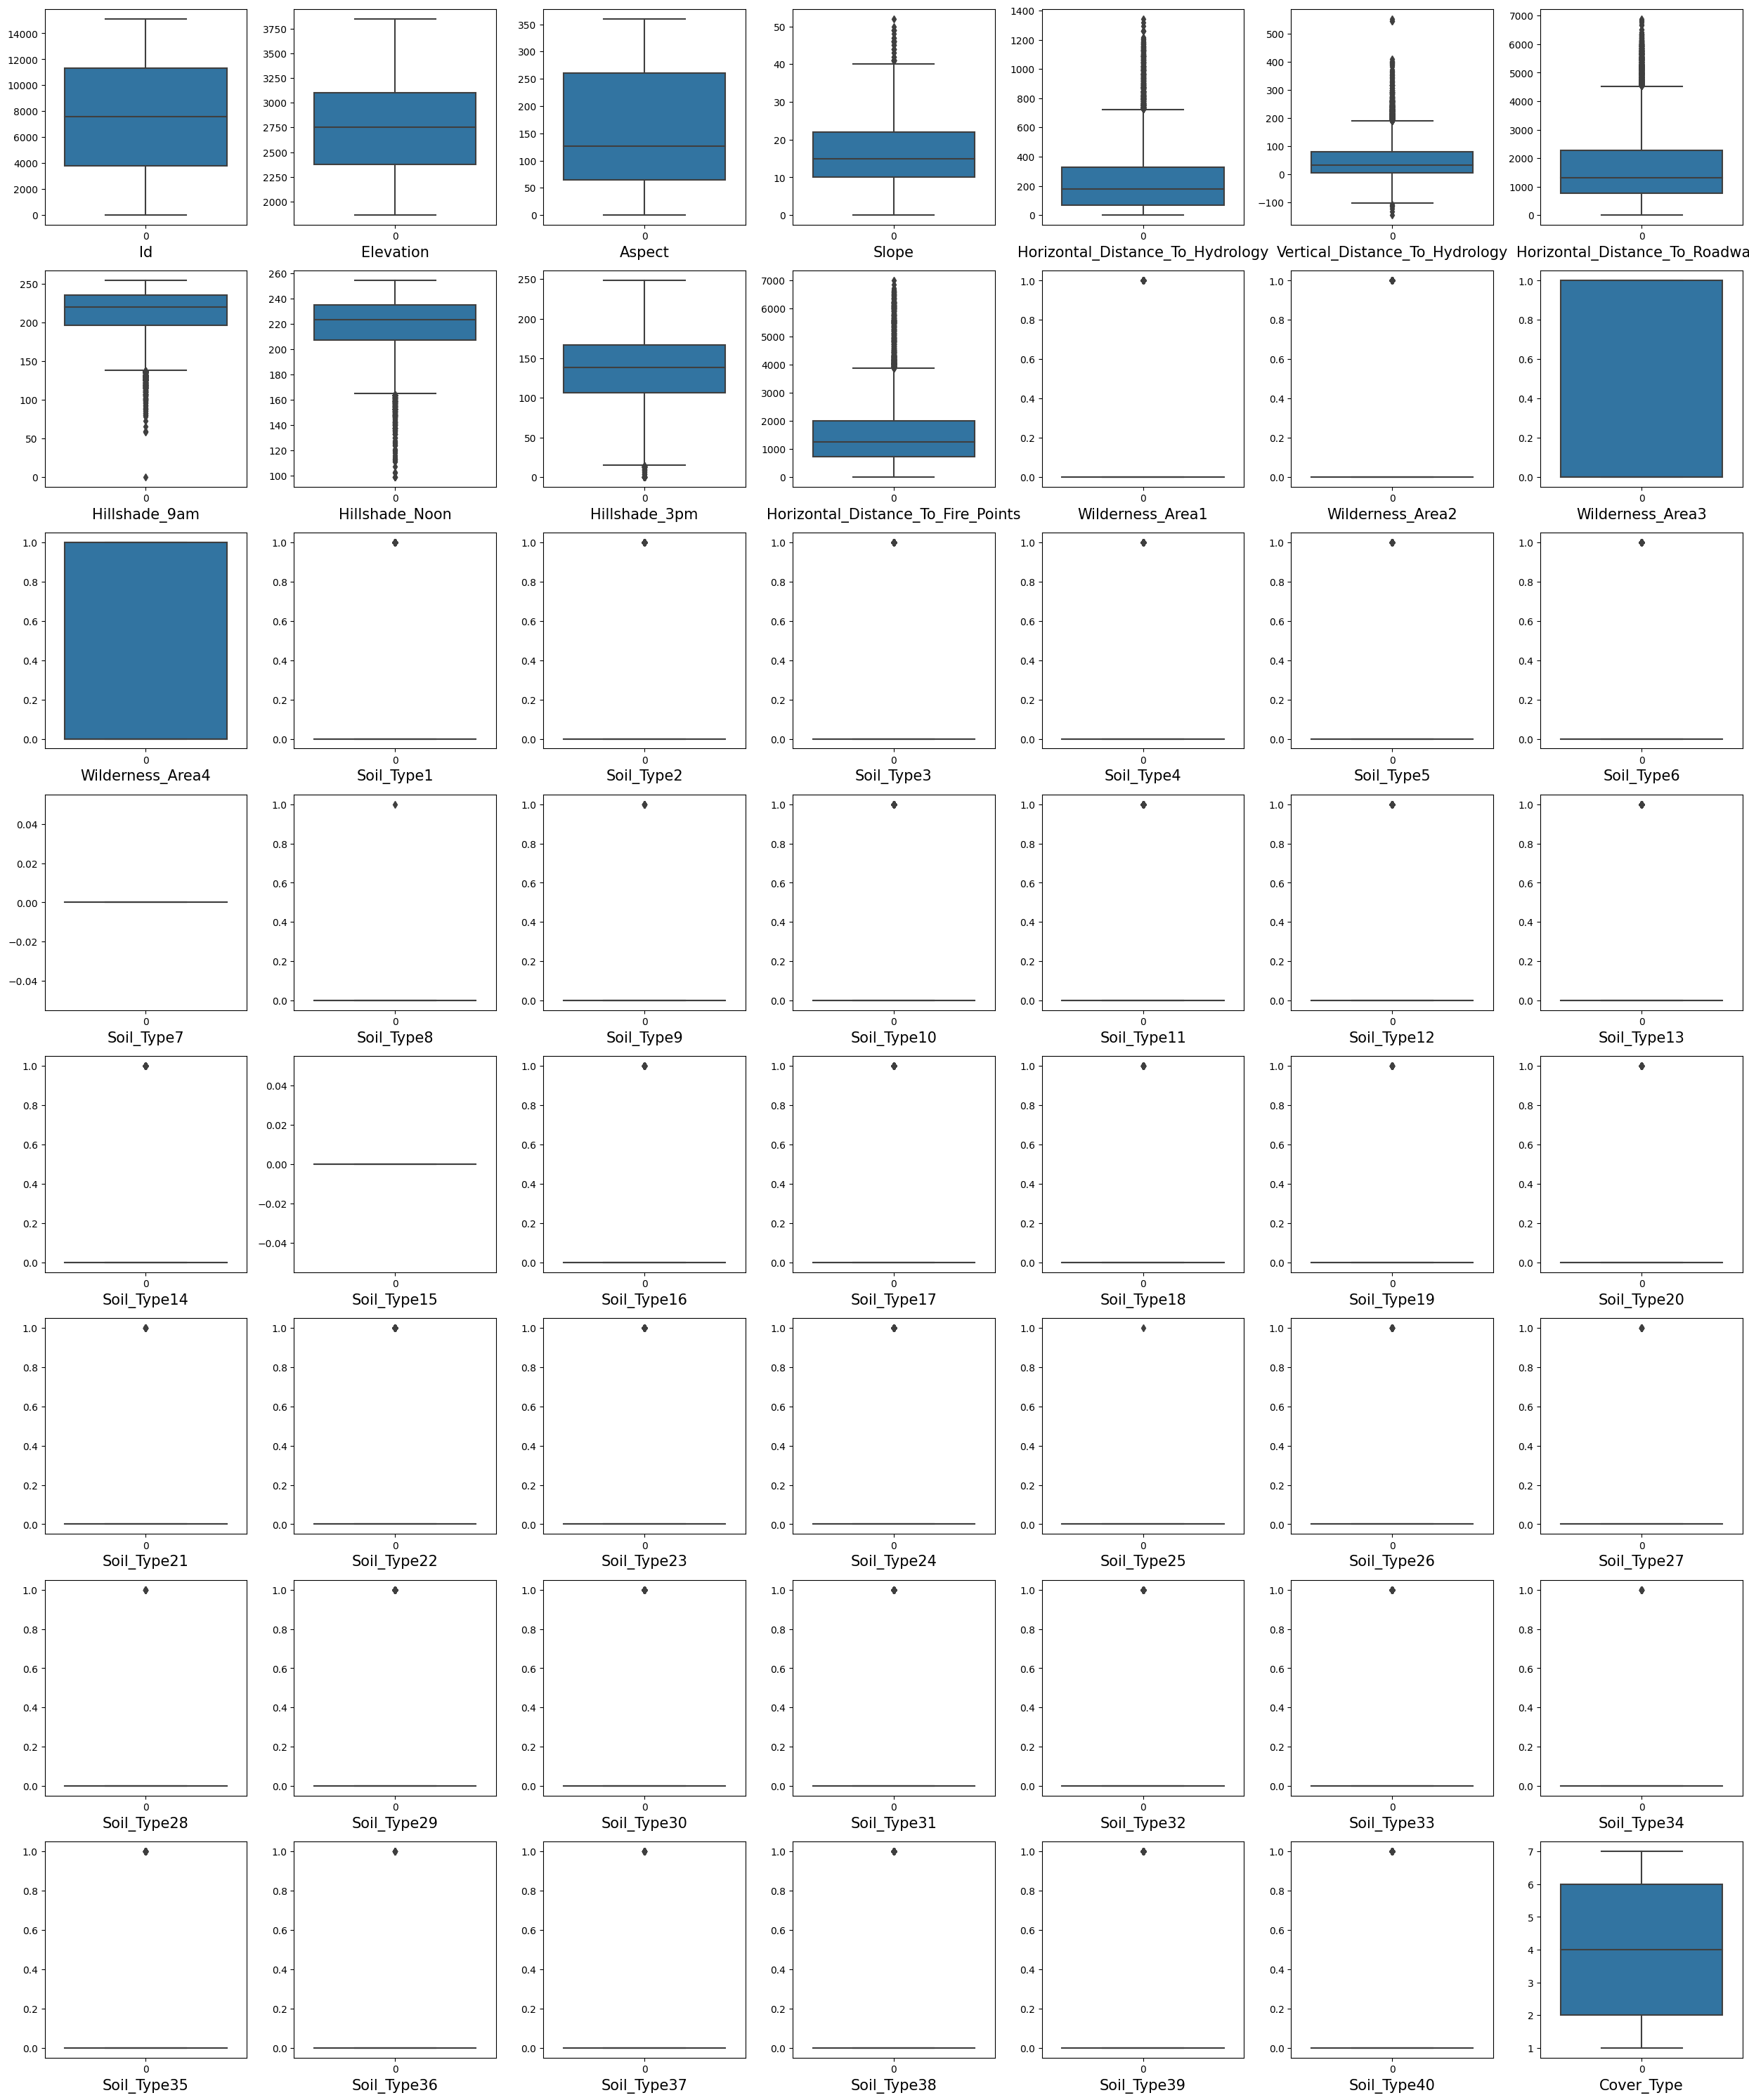

In [31]:
plt.figure(figsize=(25,30),facecolor='white')

plotnumber=1

for column in data:
    if plotnumber<=56 :
        ax=plt.subplot(8,7,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

* outliers in numerical variables are handled
* Not doing this process in ordinal categories,because that will lead missing data or wrong information

In [32]:
num_data=  data[['Elevation', 'Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am',
                 'Hillshade_Noon','Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]

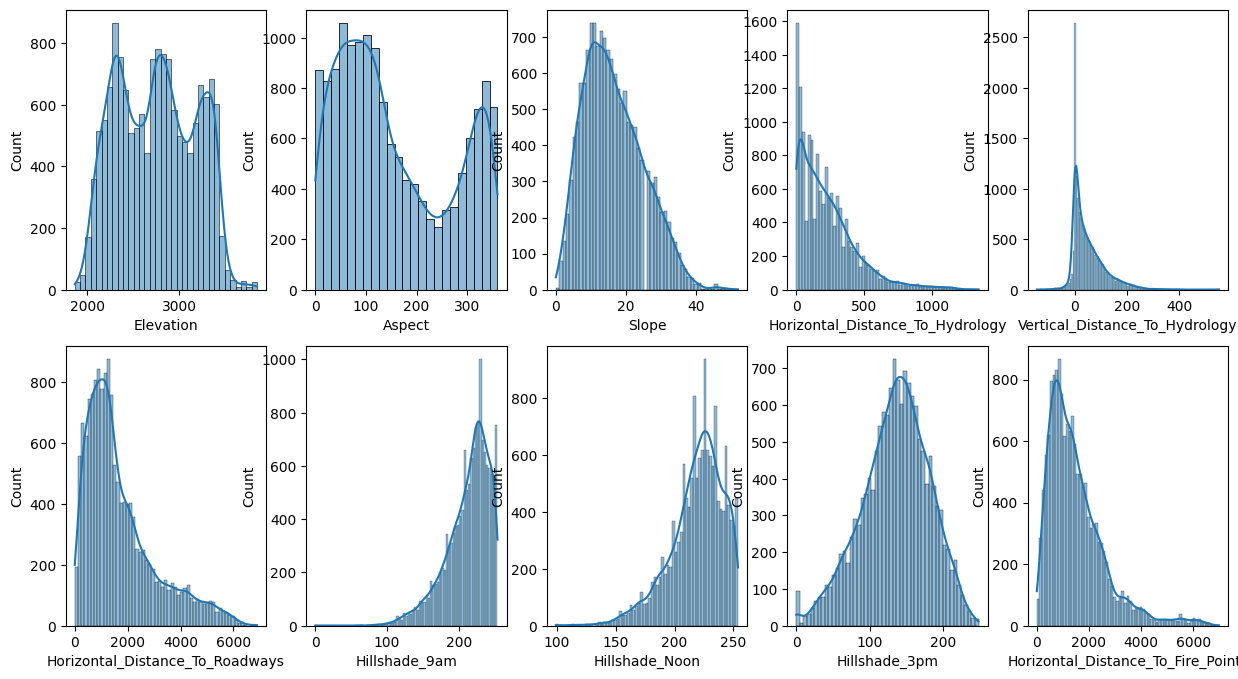

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure(figsize=(15,8))
plt_num = 1
for i in num_data:
  if plt_num <= 10:
        plt.subplot(2,5,plt_num)
        sns.histplot(x=i, data=data,kde=True)
  plt_num += 1
plt.show()
plt.tight_layout()


In [34]:
from scipy import stats

In [35]:
for i in num_data:
         IQR = stats.iqr(num_data[i], interpolation = 'midpoint')
         Q1 = num_data[i].quantile(0.25)
         Q3 =num_data[i].quantile(0.75)
         min_limit=Q1 - 1.5*IQR
         max_limit=Q3 +1.5*IQR
         print(i)
         print('lwlmt',min_limit)
         print('uplmt',max_limit)
         print('percentage of uplmt',len(num_data.loc[num_data[i] > max_limit])/len(data)*100)
         print('percentage of lwlmt',len(num_data.loc[num_data[i] < min_limit])/len(data)*100)
         s= len(num_data.loc[num_data[i] > max_limit])/len(data)*100 + len(num_data.loc[num_data[i] < min_limit])/len(data)*100
         print('outlier percentage:',s)
         if s<=5.0:
          print("median is {}".format( data[i].median()))
          data.loc[data[i]<min_limit,i]=data[i].median()
          data.loc[data[i]>max_limit,i]=data[i].median()
         print("**********************")

Elevation
lwlmt 1284.0
uplmt 4196.0
percentage of uplmt 0.0
percentage of lwlmt 0.0
outlier percentage: 0.0
median is 2752.0
**********************
Aspect
lwlmt -229.0
uplmt 555.0
percentage of uplmt 0.0
percentage of lwlmt 0.0
outlier percentage: 0.0
median is 126.0
**********************
Slope
lwlmt -8.0
uplmt 40.0
percentage of uplmt 0.376984126984127
percentage of lwlmt 0.0
outlier percentage: 0.376984126984127
median is 15.0
**********************
Horizontal_Distance_To_Hydrology
lwlmt -327.5
uplmt 724.5
percentage of uplmt 3.3862433862433865
percentage of lwlmt 0.0
outlier percentage: 3.3862433862433865
median is 180.0
**********************
Vertical_Distance_To_Hydrology
lwlmt -106.0
uplmt 190.0
percentage of uplmt 3.8293650793650795
percentage of lwlmt 0.0462962962962963
outlier percentage: 3.875661375661376
median is 32.0
**********************
Horizontal_Distance_To_Roadways
lwlmt -1495.0
uplmt 4529.0
percentage of uplmt 5.489417989417989
percentage of lwlmt 0.0
outlier perce

* outliers in ['Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Hillshade_9am','Hillshade_Noon','Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'] these columns are handled using median

<Axes: >

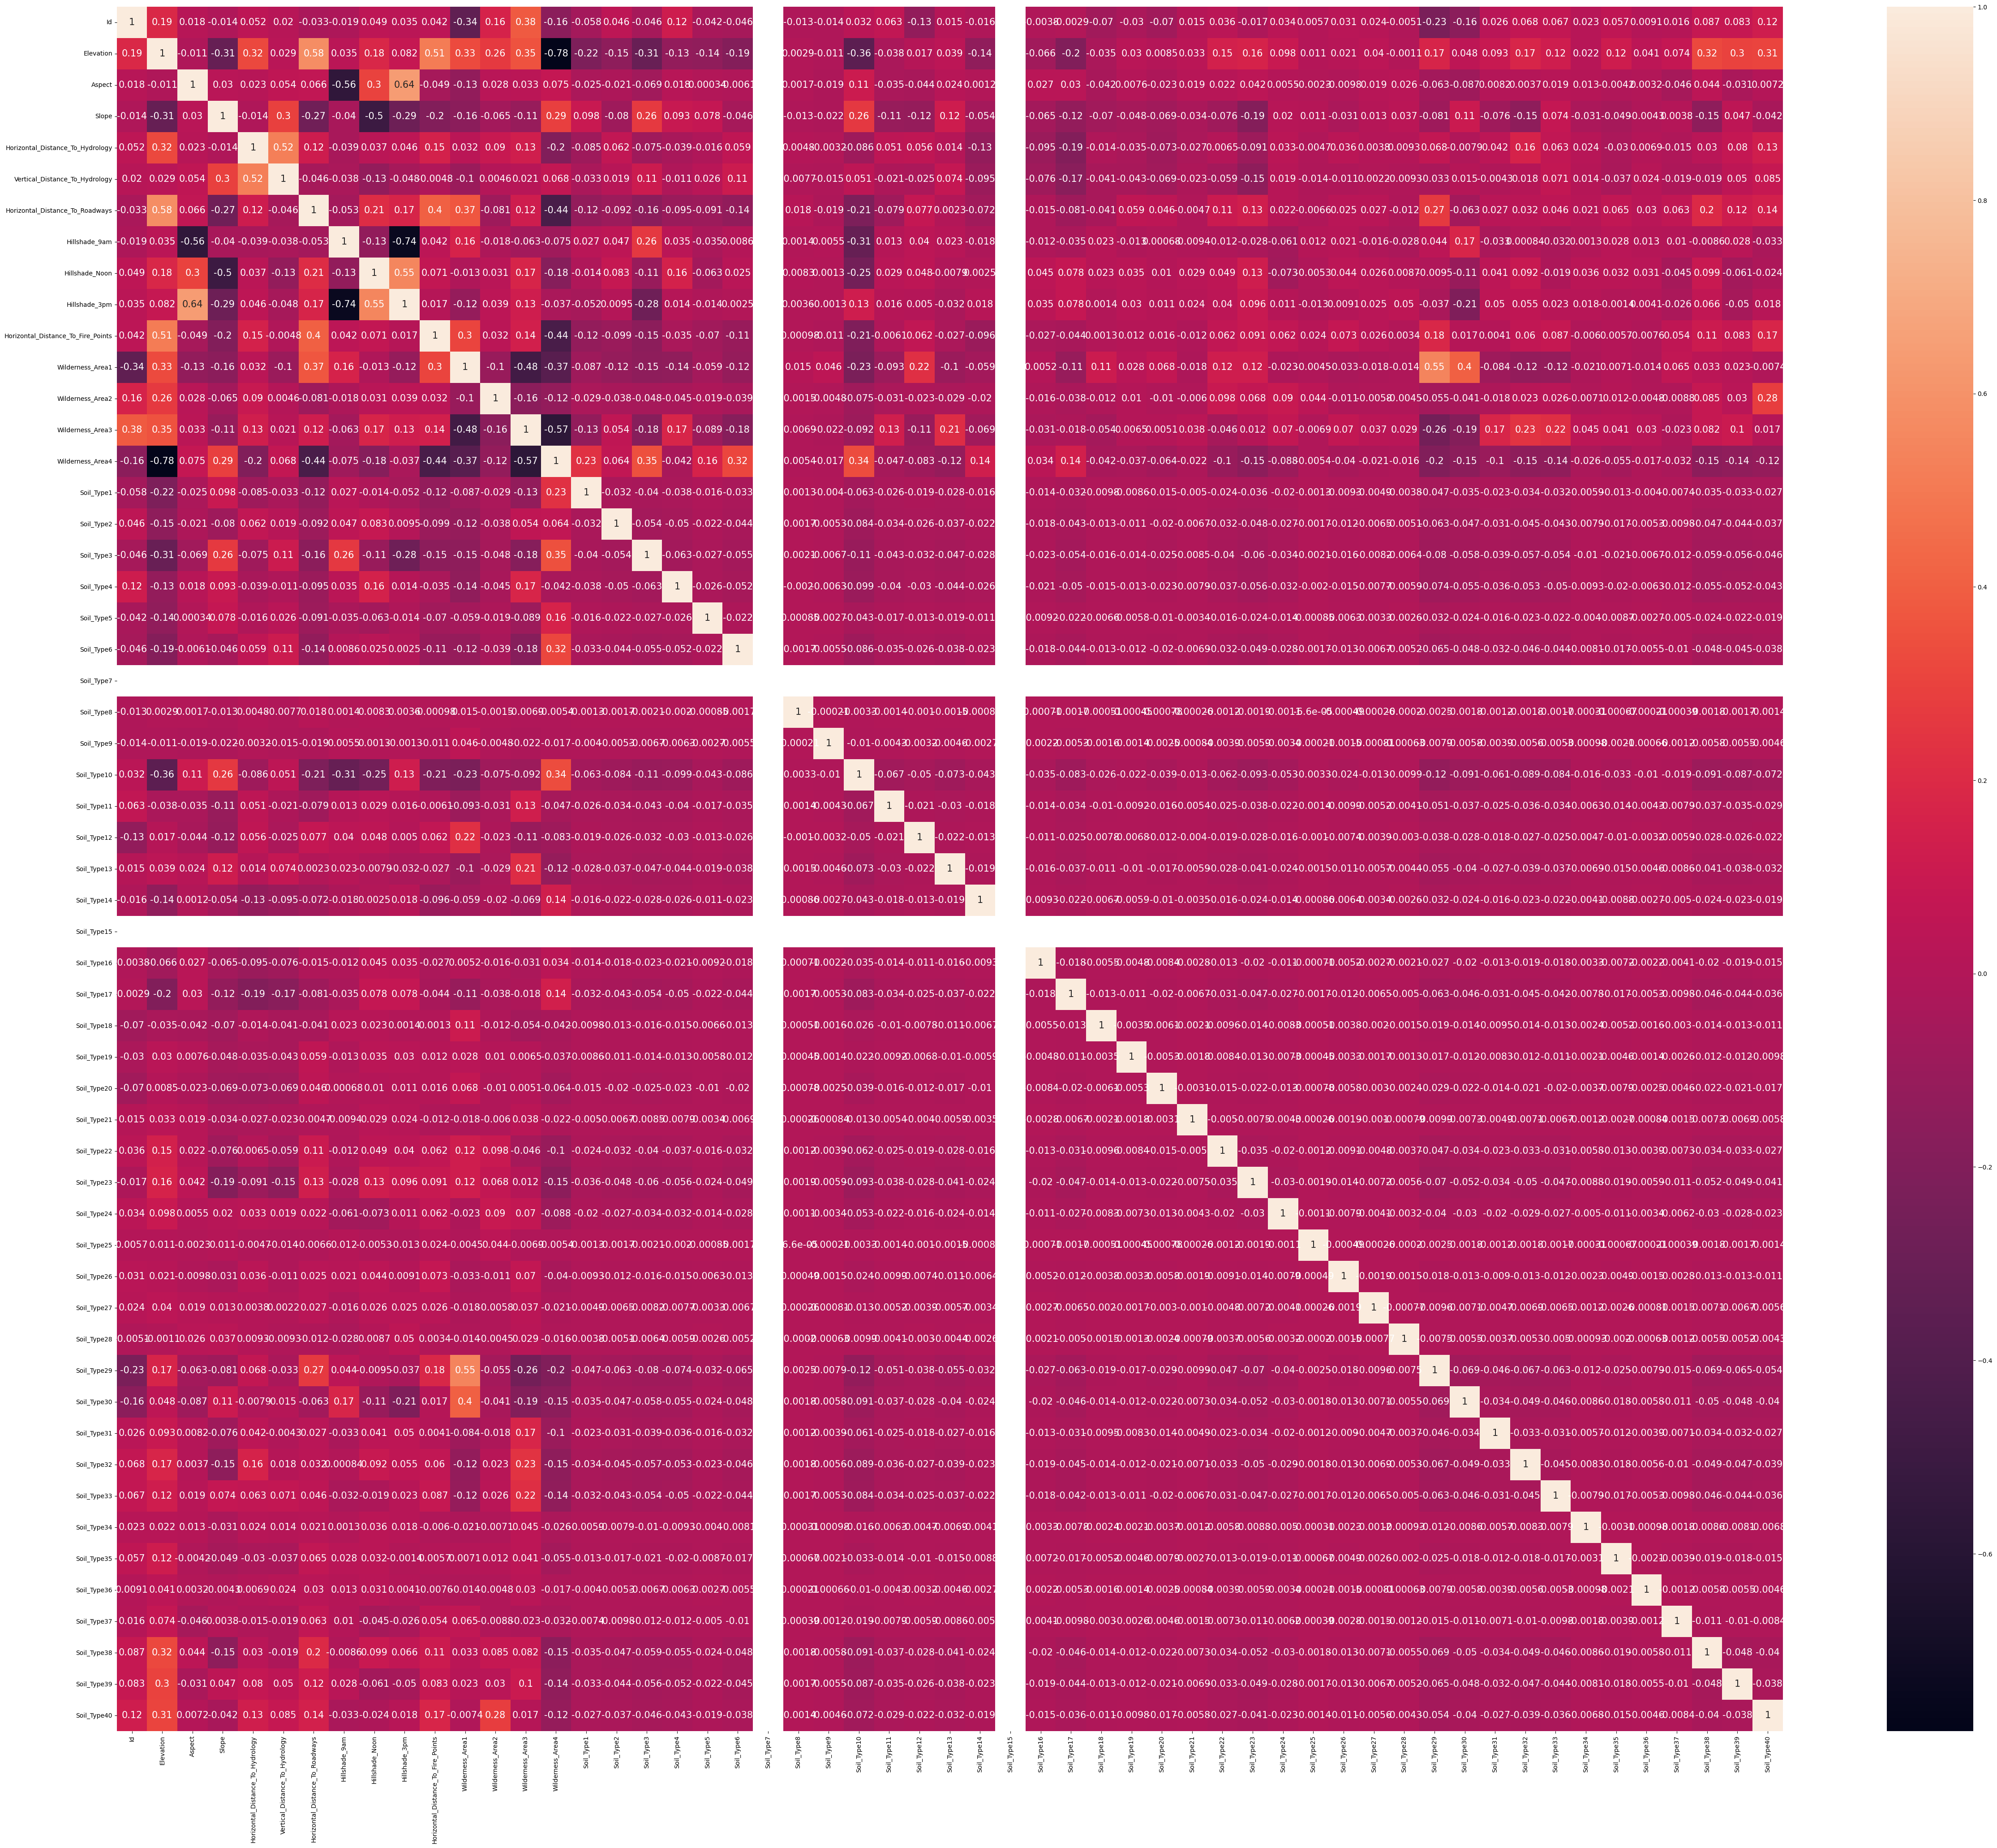

In [36]:
plt.figure(figsize=(60,50))
sns.heatmap(data.drop(['Cover_Type'],axis=1).corr(),annot=True, annot_kws={"size":15})

-->Scaling

In [37]:
data.to_csv('capstone3_forest_prepro.csv')

In [83]:
data=pd.read_csv('/content/gdrive/My Drive/capstone project/forest_cover/capstone3_forest_prepro.csv')

In [84]:
from sklearn.preprocessing import StandardScaler
stanscale=StandardScaler()
stdf=stanscale.fit_transform(data.drop(['Cover_Type'],axis=1))

In [85]:
x=stdf
y=data['Cover_Type']

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=3)
print(x_train.shape)
print(x_test.shape)

(11340, 56)
(3780, 56)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier




In [43]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score, roc_auc_score

from sklearn.neural_network import MLPRegressor
modelann = MLPRegressor( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2)

# **Model building and evaluation with standard scaled data**

In [44]:
#  function to train and test model
def train_test_model(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')
    cf=confusion_matrix(y_test,y_pred)

    model_eval = pd.DataFrame({'Accuracy': [accuracy],
                                'Precision': [precision],
                                'Recall': [recall],
                                'F1 Score': [f1],
                                 'confusion_matrix':[cf]},
                                   index=[model_name])

    return model_eval

*  Finding neighbors size in KNN Classifier

In [45]:
# create empty list to store error values
error_rate=[]

for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.21957671957671956,
 0.2492063492063492,
 0.23544973544973544,
 0.24338624338624337,
 0.25105820105820104,
 0.2529100529100529,
 0.2552910052910053,
 0.26296296296296295,
 0.2656084656084656,
 0.2671957671957672]

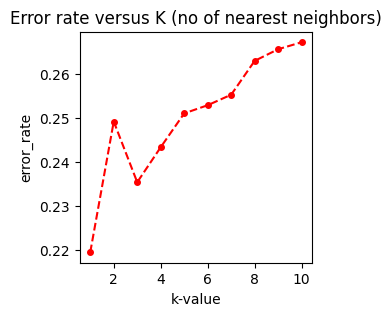

In [46]:
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

* n_neighbors=1 beacuse it gives less error value

In [49]:
# create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'MLPclassifier':MLPClassifier( hidden_layer_sizes=(50,3),learning_rate_init=0.1,max_iter=100,random_state=2)
}

# train and test models
models_eval = pd.DataFrame()
for model_name, model in models.items():
    models_eval = models_eval.append(train_test_model(model, model_name, x_train, x_test, y_train, y_test))


In [51]:
models_eval

Accuracy  Precision    Recall  F1 Score  \
Logistic Regression  0.693386   0.688466  0.693386  0.689686   
KNN                  0.780423   0.775854  0.780423  0.777023   
SVM                  0.717725   0.714520  0.717725  0.714327   
Naive Bayes          0.465608   0.469066  0.465608  0.379034   
Decision Tree        0.796032   0.794732  0.796032  0.795195   
Random Forest        0.868254   0.865803  0.868254  0.866076   
Gradient Boosting    0.809524   0.804654  0.809524  0.805333   
MLPclassifier        0.699471   0.700746  0.699471  0.699623   

                                                      confusion_matrix  
Logistic Regression  [[349, 99, 0, 0, 12, 2, 69], [141, 286, 7, 0, ...  
KNN                  [[342, 115, 0, 0, 16, 4, 54], [127, 332, 13, 1...  
SVM                  [[342, 119, 0, 0, 14, 3, 53], [149, 310, 13, 1...  
Naive Bayes          [[91, 1, 5, 0, 113, 18, 303], [84, 6, 45, 5, 2...  
Decision Tree        [[363, 110, 0, 0, 9, 2, 47], [125, 348, 16, 0,...  
Random Forest        [[405, 71, 0, 0, 10, 1, 44], [110, 387, 14, 0,...  
Gradient Boosting    [[355, 99, 0, 0, 16, 2, 59], [125, 335, 14, 0,...  
MLPclassifier        [[351, 99, 0, 0, 10, 0, 71], [150, 291, 11, 0,...

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train= le.fit_transform(y_train)

In [59]:
xgb=XGBClassifier()
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)



In [60]:
y_pred = le.inverse_transform(y_pred)


In [61]:
confusion_matrix(y_test,y_pred)

array([[402,  79,   0,   0,   6,   2,  42],
       [107, 385,  14,   0,  38,   8,   4],
       [  0,   7, 474,  22,   6,  49,   0],
       [  0,   0,   4, 498,   0,   8,   0],
       [  0,  12,   8,   0, 506,   1,   0],
       [  1,   5,  49,   9,   6, 486,   0],
       [ 14,   0,   0,   0,   0,   0, 528]])

In [62]:
print('accuracy_score',accuracy_score(y_test, y_pred))
print('precision_score',precision_score(y_test, y_pred,average='weighted'))
print('recall_score',recall_score(y_test, y_pred,average='weighted'))
print('f1_score',f1_score(y_test, y_pred,average='weighted'))


accuracy_score 0.8674603174603175
precision_score 0.8647376191519289
recall_score 0.8674603174603175
f1_score 0.8653343958836888


* Random forest gives the best score without hyperparameter tuning



# Model bulding and evaluation with minmax scaled data


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minscale=MinMaxScaler()
mindf=minscale.fit_transform(data.drop(['Cover_Type'],axis=1))

In [ ]:
x_min=mindf
x_min.shape

(15120, 56)

In [ ]:
#minmax scaled data split
xmin=mindf
xmin_train,xmin_test,y_train,y_test=train_test_split(xmin, y,random_state=3)
print(xmin_train.shape)
print(xmin_test.shape)

(11340, 56)
(3780, 56)


In [ ]:
#  function to train and test model
def train_test_model(model, model_name, xmin_train, xmin_test, y_train, y_test):
    model.fit(xmin_train, y_train)
    y_pred = model.predict(xmin_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')


    model_eval = pd.DataFrame({'Accuracy': [accuracy],
                                'Precision': [precision],
                                'Recall': [recall],
                                'F1 Score': [f1]},
                                   index=[model_name])
    return model_eval

In [ ]:
# create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'MLPclassifier':MLPClassifier( hidden_layer_sizes=(50,3),learning_rate_init=0.1,max_iter=100,random_state=2)
}

# train and test models
models_eval = pd.DataFrame()
for model_name, model in models.items():
    models_eval = models_eval.append(train_test_model(model, model_name, xmin_train, xmin_test, y_train, y_test))


In [ ]:
models_eval

Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.661640   0.659408  0.661640  0.659333
KNN                  0.779894   0.775080  0.779894  0.776345
SVM                  0.695503   0.693656  0.695503  0.692016
Naive Bayes          0.468783   0.483662  0.468783  0.377758
Decision Tree        0.792593   0.791248  0.792593  0.791819
Random Forest        0.867460   0.865117  0.867460  0.865353
Gradient Boosting    0.808730   0.803881  0.808730  0.804616
MLPclassifier        0.678042   0.682002  0.678042  0.666928

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train= le.fit_transform(y_train)

In [ ]:
xgb=XGBClassifier()
xgb.fit(xmin_train, y_train)
y_pred=xgb.predict(xmin_test)

In [ ]:
y_pred = le.inverse_transform(y_pred)


In [ ]:
print('accuracy_score',accuracy_score(y_test, y_pred))
print('precision_score',precision_score(y_test, y_pred,average='weighted'))
print('recall_score',recall_score(y_test, y_pred,average='weighted'))
print('f1_score',f1_score(y_test, y_pred,average='weighted'))


accuracy_score 0.8664021164021164
precision_score 0.8636138604561665
recall_score 0.8664021164021164
f1_score 0.8642936736187917


* Standard scaled data is giving best models compared to minmax




# **Hyperparameter Tuning**

Doing Hyperparameter tuning in Random Forest,XGBoost,Gradient Boosting,Decision Tree,KNN

finding best paramerters using randomized searchcv

In [12]:
from sklearn.model_selection import RandomizedSearchCV


-->knn

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,11))
p=[1,2]
algorithm=['auto']

In [ ]:
param= {'leaf_size':leaf_size, 'n_neighbors':n_neighbors, 'algorithm':algorithm,'p':p}

rf_knn=KNeighborsClassifier()
rf_cv = RandomizedSearchCV(estimator=rf_knn, scoring='accuracy',param_distributions=param, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'p': 1, 'n_neighbors': 1, 'leaf_size': 23, 'algorithm': 'auto'})


In [ ]:
# Hyper parameter tuning
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

-->Decision tree

In [ ]:
modeldt = DecisionTreeClassifier()#model

rf_dt = RandomizedSearchCV(estimator=modeldt, scoring='accuracy',param_distributions=parameters, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_dt.fit(x_train, y_train)
rf_best_params = rf_dt.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 7, 'max_leaf_nodes': 60, 'max_depth': 7})


In [11]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

-->Random forest classifier

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

regr1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 555, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False})


-->GradientBoostingClassifier

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                "loss":( 'exponential', 'deviance', 'log_loss' )}

regr1 = GradientBoostingClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 466, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'loss': 'deviance'})


In [55]:
# create a dictionary of models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=1,p= 1,leaf_size= 23, algorithm='auto'),
    'Decision Tree': DecisionTreeClassifier(splitter= 'random', min_weight_fraction_leaf= 0.1, min_samples_leaf= 5,max_leaf_nodes=90, max_features=None,max_depth= 7),
    'Random Forest': RandomForestClassifier(n_estimators= 555, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=50, bootstrap= False),
    'Gradient boost':GradientBoostingClassifier(n_estimators= 466, min_samples_split=5,min_samples_leaf= 4,max_features='sqrt', max_depth=10, loss='deviance')

}

# train and test models
models_eval = pd.DataFrame()
for model_name, model in models.items():
    models_eval = models_eval.append(train_test_model(model, model_name, x_train, x_test, y_train, y_test))


In [57]:
models_eval

Accuracy  Precision    Recall  F1 Score  \
KNN             0.796296   0.791402  0.796296  0.792094   
Decision Tree   0.424603   0.373822  0.424603  0.387579   
Random Forest   0.883862   0.882207  0.883862  0.882361   
Gradient boost  0.882011   0.880230  0.882011  0.880712   

                                                 confusion_matrix  
KNN             [[355, 95, 0, 0, 19, 4, 58], [127, 334, 17, 2,...  
Decision Tree   [[183, 132, 0, 0, 10, 9, 197], [134, 198, 0, 1...  
Random Forest   [[418, 68, 0, 0, 7, 1, 37], [105, 404, 12, 0, ...  
Gradient boost  [[415, 73, 0, 0, 6, 1, 36], [96, 414, 12, 0, 2...

-->XGBOOST

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train= le.fit_transform(y_train)

In [15]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
               'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
               'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}


regr1 = XGBClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='accuracy',param_distributions=random_grid, n_iter=70, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 70 candidates, totalling 210 fits
Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.4, 'n_estimators': 466, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'gamma': 0})


In [80]:
xgb=XGBClassifier(reg_lambda= 0.2,reg_alpha= 0.4, n_estimators=466, min_samples_split= 5,min_samples_leaf= 2, max_features='auto', max_depth=30, gamma= 0)
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)



In [81]:
y_pred = le.inverse_transform(y_pred)


In [82]:
print('accuracy_score',accuracy_score(y_test, y_pred))
print('precision_score',precision_score(y_test, y_pred,average='weighted'))
print('recall_score',recall_score(y_test, y_pred,average='weighted'))
print('f1_score',f1_score(y_test, y_pred,average='weighted'))


accuracy_score 0.8714285714285714
precision_score 0.8689992977451947
recall_score 0.8714285714285714
f1_score 0.8694236163257631


In [19]:
confusion_matrix(y_test,y_pred)

array([[406,  72,   0,   0,   7,   2,  44],
       [102, 392,  14,   0,  39,   5,   4],
       [  0,   8, 473,  26,   4,  47,   0],
       [  0,   0,   2, 501,   0,   7,   0],
       [  1,  10,   9,   0, 505,   2,   0],
       [  0,   3,  48,   7,   5, 493,   0],
       [ 16,   2,   0,   0,   0,   0, 524]])

**Conclusion:**

Randomforestclassifier and gradientboosting classifier gives the best result (88%); lets check the roc_score

Randomforestclassifier

In [90]:
rf= RandomForestClassifier(n_estimators= 555, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=50, bootstrap= False)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)

In [91]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.77      0.78      0.78       531
           2       0.82      0.72      0.76       556
           3       0.88      0.86      0.87       558
           4       0.95      0.98      0.96       510
           5       0.93      0.97      0.95       527
           6       0.89      0.90      0.90       556
           7       0.93      0.97      0.95       542

    accuracy                           0.88      3780
   macro avg       0.88      0.88      0.88      3780
weighted avg       0.88      0.88      0.88      3780



In [153]:
pred_prob = rf.predict_proba(x_test)
roc_auc_score(y_test, pred_prob, multi_class='ovr')


0.9879833874354362

* GradientBoostingClassifier

In [106]:
gb=GradientBoostingClassifier(n_estimators= 466, min_samples_split=5,min_samples_leaf= 4,max_features='sqrt', max_depth=10, loss='deviance')

In [107]:
gb.fit(x_train, y_train)
y_pred_gb=gb.predict(x_test)

In [108]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           1       0.79      0.79      0.79       531
           2       0.82      0.73      0.77       556
           3       0.88      0.87      0.88       558
           4       0.95      0.98      0.96       510
           5       0.90      0.96      0.93       527
           6       0.90      0.89      0.90       556
           7       0.93      0.97      0.95       542

    accuracy                           0.88      3780
   macro avg       0.88      0.88      0.88      3780
weighted avg       0.88      0.88      0.88      3780



In [154]:
pred_prob = gb.predict_proba(x_test)
roc_auc_score(y_test, pred_prob, multi_class='ovr')


0.9867016417815206

* Random Forest classifier:
  * Accuracy:0.8838624338624339 ,
  * Precision:0.8822070936101524,
  * Recall:0.8838624338624339,
  * F1 Score:0.8823605529901968,
  * confusion matrix:
[418 68   0     0     7   1   37]
[105 404   12    0    27   7    1]
[ 0   2   485   22     6   43   0]
[ 0   0    6    501    0   3    0]
[ 1    9    7    0    507  3    0]
[ 0    3   44    7     3   499   0]
[ 14   1   0     0     0    0   527]]

 * roc_auc_score: 0.9879833874354362


* Gradient boosting classifier:
  * Accuracy:0.882010582010582,
  * Precision:	0.8802300451146746,
  * Recall:0.882010582010582,
  * F1 Score:	0.8807122058291444,
  * confusion matrix:
  [415 73   0   0   6   1  36]
  [ 96  414  12  0   27  4   3]
  [ 0   7   478  19  10  44  0]
  [ 0   0    5   500  0  5   0]
  [ 0   12   7   0   506 2   0]
  [ 0   4    41  11  4  496  0]
  [ 16  1    0   0   0  0 525]]

 * roc_auc_score: 0.9867016417815206




conclusion:Both Random Forest classifier and gradient boosting classifier gives the best result.scorings are near to similar

                      --->PREDICTION(Wilderness_Areas v/s cover types)





In [118]:
y_test

8344     7
28       2
6983     1
10096    1
9904     7
        ..
10413    1
2870     6
7732     2
7735     6
7444     2
Name: Cover_Type, Length: 3780, dtype: int64

In [147]:
cover_type_true=pd.DataFrame(y_test)
cover_type_true

Cover_Type
8344            7
28              2
6983            1
10096           1
9904            7
...           ...
10413           1
2870            6
7732            2
7735            6
7444            2

[3780 rows x 1 columns]

In [148]:
prediction=pd.DataFrame({'cover_type_true':cover_type_true['Cover_Type'],'gradient_boosting':y_pred_gb,'random_forest':y_pred_rf})
prediction


cover_type_true  gradient_boosting  random_forest
8344                 7                  7              7
28                   2                  2              2
6983                 1                  1              1
10096                1                  1              1
9904                 7                  7              7
...                ...                ...            ...
10413                1                  1              1
2870                 6                  3              3
7732                 2                  2              2
7735                 6                  6              6
7444                 2                  2              2

[3780 rows x 3 columns]

In [131]:
original_data = stanscale.inverse_transform(x_test)
original_df=pd.DataFrame(original_data,columns=data.columns.drop('Cover_Type'))


In [149]:
prediction[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']]= pd.DataFrame(original_df[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']])


In [151]:
prediction

cover_type_true  gradient_boosting  random_forest  Wilderness_Area1  \
8344                 7                  7              7               NaN   
28                   2                  2              2     -2.775558e-17   
6983                 1                  1              1               NaN   
10096                1                  1              1               NaN   
9904                 7                  7              7               NaN   
...                ...                ...            ...               ...   
10413                1                  1              1               NaN   
2870                 6                  3              3     -2.775558e-17   
7732                 2                  2              2               NaN   
7735                 6                  6              6               NaN   
7444                 2                  2              2               NaN   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  
8344                NaN               NaN               NaN  
28                  1.0               0.0               0.0  
6983                NaN               NaN               NaN  
10096               NaN               NaN               NaN  
9904                NaN               NaN               NaN  
...                 ...               ...               ...  
10413               NaN               NaN               NaN  
2870                0.0               1.0               0.0  
7732                NaN               NaN               NaN  
7735                NaN               NaN               NaN  
7444                NaN               NaN               NaN  

[3780 rows x 7 columns]

**Report** :
* The data is already contained numerical and binary values(label_encoded) so need to look for the orginal dataset for learn about the dataset like what are the covertypes and wilderness.
* Functions are used for modeling :using function it's look more neat and easy understand
* Error occured while doing Xgboost,because in xgboost the order should be start with 0 but the cover type start with 1 ; so label_encoder()  applied before doing xgboost.
* For hyperparameter tuning only randomzied searchcv applied for
* Time consuming for hyperparameter tuning;In xgboost the consuming time is morethan 10 hrs still dosen't get the best_params_, so I reduced the n_iter value and set it as 70 but in others its 100.
* There is some multiclass error appeared in roc_auc_score so, instead of y_pred, used  predict  probabilities

